In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import f_oneway, kruskal
import random

In [2]:
df = pd.read_csv("walmart_data.txt")

In [3]:
df.shape

(550068, 10)

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [726]:
df.shape

(550068, 10)

In [727]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [728]:
df["User_ID"] = df["User_ID"].astype("object")
df["Occupation"] = df["Occupation"].astype("object")
df["Marital_Status"] = df["Marital_Status"].astype("object")
df["Product_Category"] = df["Product_Category"].astype("object")

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [730]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [731]:
occupation_categories = [
    "Teacher", "Doctor", "Engineer", "Artist", "Accountant", "Chef", "Lawyer", "Salesperson", "Nurse", "Software Developer", "Police Officer",
    "Entrepreneur", "Writer", "Electrician", "Designer", "Mechanic", "Architect", "Barista", "Librarian", "Plumber", "Pilot"
]

occupation_dict = {i: occupation for i, occupation in enumerate(occupation_categories)}

df['Occupation'] = df['Occupation'].replace(occupation_dict)

In [732]:

product_categories = [
    "Electronics", "Clothing", "Home Appliances", "Toys", "Groceries", "Furniture", "Sporting Goods", "Beauty and Personal Care", "Automotive",
    "Books", "Jewelry", "Health and Wellness", "Pet Supplies", "Office Supplies", "Outdoor Equipment", "Video Games", "Kitchenware",
    "Baby Products", "Tools and Hardware", "Home Decor", "Music and Movies"
]

product_cat_dict = {i: category for i, category in enumerate(product_categories)}

df['Product_Category'] = df['Product_Category'].replace(product_cat_dict)


In [733]:
marital_status_categories = [
    "Single", "Married"
]

marital_status_dict = {i: category for i, category in enumerate(marital_status_categories)}

df['Marital_Status'] = df['Marital_Status'].replace(marital_status_dict)

In [734]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,Police Officer,A,2,Single,Toys,8370
1,1000001,P00248942,F,0-17,Police Officer,A,2,Single,Clothing,15200
2,1000001,P00087842,F,0-17,Police Officer,A,2,Single,Pet Supplies,1422
3,1000001,P00085442,F,0-17,Police Officer,A,2,Single,Pet Supplies,1057
4,1000002,P00285442,M,55+,Architect,C,4+,Single,Automotive,7969


In [735]:
df.describe().round(4)

,Purchase
count,550068.0000
mean,9263.9687
std,5023.0654
min,12.0000
25%,5823.0000
50%,8047.0000
75%,12054.0000
max,23961.0000


In [736]:
df.describe(include=['object'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,Accountant,B,1,Single,Furniture
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [737]:

data = {}
for col in df.columns:
    if df[col].dtype == 'O':
        data[col] = [str(df[col].nunique())]

data_t = pd.DataFrame(data)
data_t

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
0,5891,3631,2,7,21,3,5,2,20


In [738]:
def get_value_count_df(df, col_name):
    param = []
    param_val = []
    param_val_count = []

    t_data = df[col_name].value_counts().reset_index()
    for i in range(t_data.shape[0]):
        param.append(col_name)
        param_val.append(t_data.iloc[i]["index"])
        param_val_count.append(t_data.iloc[i][col_name])

    val_count_dt = pd.DataFrame(
        {
            "Parameter Name" : param,
            "Parameter Value" : param_val,
            "Parameter Value Count" : param_val_count
        }
    )

    return val_count_dt

In [739]:
get_value_count_df(df,"Gender")

,Parameter Name,Parameter Value,Parameter Value Count
0,Gender,M,414259
1,Gender,F,135809


In [740]:
get_value_count_df(df,"Age")

,Parameter Name,Parameter Value,Parameter Value Count
0,Age,26-35,219587
1,Age,36-45,110013
2,Age,18-25,99660
3,Age,46-50,45701
4,Age,51-55,38501
5,Age,55+,21504
6,Age,0-17,15102


In [741]:
get_value_count_df(df, "Occupation")

,Parameter Name,Parameter Value,Parameter Value Count
0,Occupation,Accountant,72308
1,Occupation,Teacher,69638
2,Occupation,Salesperson,59133
3,Occupation,Doctor,47426
4,Occupation,Barista,40043
5,Occupation,Pilot,33562
6,Occupation,Writer,31179
7,Occupation,Designer,27309
8,Occupation,Engineer,26588
9,Occupation,Architect,25371


In [742]:
get_value_count_df(df, "City_Category")

,Parameter Name,Parameter Value,Parameter Value Count
0,City_Category,B,231173
1,City_Category,C,171175
2,City_Category,A,147720


In [743]:
get_value_count_df(df, "Stay_In_Current_City_Years")

,Parameter Name,Parameter Value,Parameter Value Count
0,Stay_In_Current_City_Years,1,193821
1,Stay_In_Current_City_Years,2,101838
2,Stay_In_Current_City_Years,3,95285
3,Stay_In_Current_City_Years,4+,84726
4,Stay_In_Current_City_Years,0,74398


In [744]:
get_value_count_df(df, "Marital_Status")

,Parameter Name,Parameter Value,Parameter Value Count
0,Marital_Status,Single,324731
1,Marital_Status,Married,225337


In [745]:
get_value_count_df(df, "Product_Category")

,Parameter Name,Parameter Value,Parameter Value Count
0,Product_Category,Furniture,150933
1,Product_Category,Clothing,140378
2,Product_Category,Automotive,113925
3,Product_Category,Health and Wellness,24287
4,Product_Category,Home Appliances,23864
5,Product_Category,Sporting Goods,20466
6,Product_Category,Toys,20213
7,Product_Category,Groceries,11753
8,Product_Category,Kitchenware,9828
9,Product_Category,Video Games,6290


In [746]:
bins = [10, 2510, 5010, 7510, 10010, 12510, 15010, 17510, 20010, 22510, 25010]
categories = pd.cut(df["Purchase"], bins=bins, labels=["10-2510", "2511-5010", "5011-7510", 
                                                  "7511-10010", "10011-12510", "12511-15010",
                                                  "15011-17510", "17511-20010", "20011-22510", "22511-25010"])
categories.value_counts().sort_index().reset_index().rename(columns={"index":"Purchase Range", "Purchase":"Count"})

,Purchase Range,Count
0,10-2510,36844
1,2511-5010,58079
2,5011-7510,133909
3,7511-10010,132675
4,10011-12510,59198
5,12511-15010,18850
6,15011-17510,66453
7,17511-20010,31439
8,20011-22510,10271
9,22511-25010,2350


In [747]:
df["Product_ID"].value_counts().reset_index().head(5)

,index,Product_ID
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470


In [748]:
df["Product_ID"].value_counts().reset_index().tail(5)

,index,Product_ID
3626,P00314842,1
3627,P00298842,1
3628,P00231642,1
3629,P00204442,1
3630,P00066342,1


In [749]:
df["User_ID"].value_counts().reset_index().head(5)

,index,User_ID
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823


In [750]:
df["User_ID"].value_counts().reset_index().tail(5)

,index,User_ID
5886,1002690,7
5887,1002111,7
5888,1005810,7
5889,1004991,7
5890,1000708,6


In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [752]:
plot_palette = ["#0071CE", "#FCB61A", "#041F41", "#EB148D"]

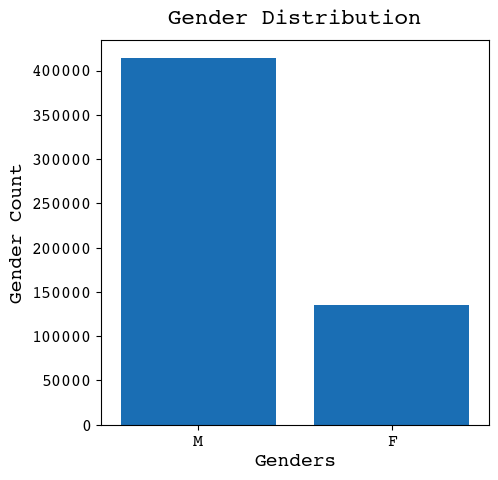

In [753]:
fig=plt.figure(figsize=(5,5))
data_t = get_value_count_df(df,"Gender")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Genders", fontsize = 14, fontname='Courier')
plt.ylabel("Gender Count", fontsize = 14, fontname='Courier')
plt.title("Gender Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

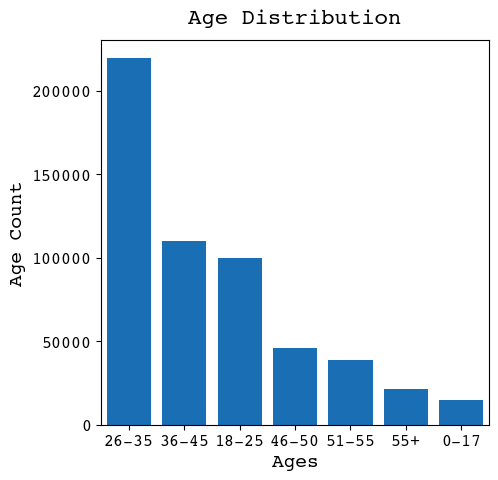

In [754]:
fig=plt.figure(figsize=(5,5))
data_t = get_value_count_df(df,"Age")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Ages", fontsize = 14, fontname='Courier')
plt.ylabel("Age Count", fontsize = 14, fontname='Courier')
plt.title("Age Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

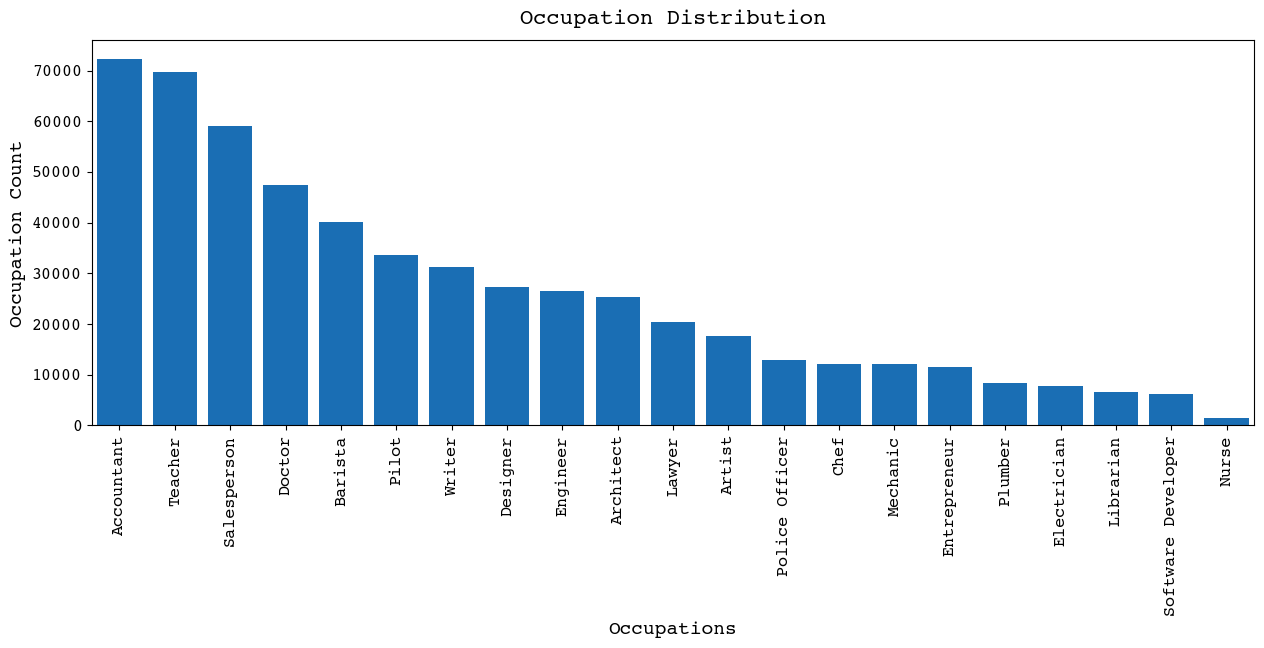

In [755]:
fig=plt.figure(figsize=(15,5))
data_t = get_value_count_df(df,"Occupation")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Occupations", fontsize = 14, fontname='Courier')
plt.ylabel("Occupation Count", fontsize = 14, fontname='Courier')
plt.title("Occupation Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

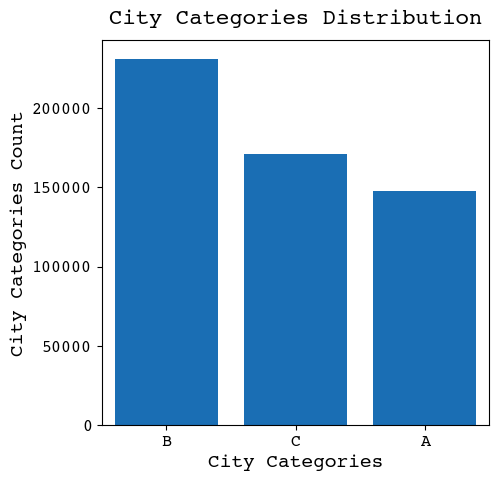

In [756]:
fig=plt.figure(figsize=(5,5))
data_t = get_value_count_df(df,"City_Category")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("City Categories", fontsize = 14, fontname='Courier')
plt.ylabel("City Categories Count", fontsize = 14, fontname='Courier')
plt.title("City Categories Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

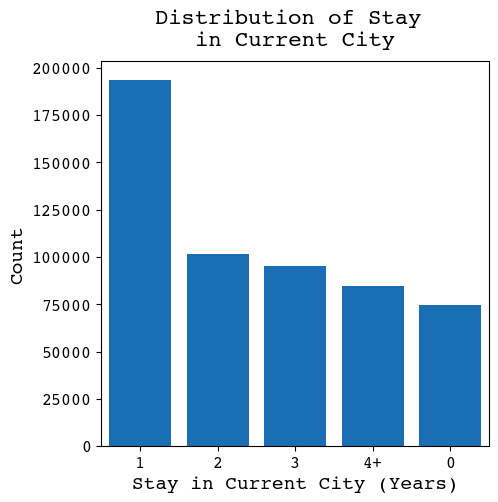

In [757]:
fig=plt.figure(figsize=(5,5))
data_t = get_value_count_df(df,"Stay_In_Current_City_Years")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Stay in Current City (Years)", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Distribution of Stay \nin Current City", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

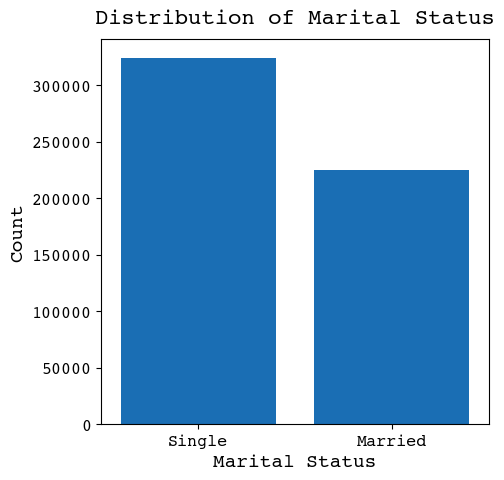

In [758]:
fig=plt.figure(figsize=(5,5))
data_t = get_value_count_df(df,"Marital_Status")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Marital Status", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Distribution of Marital Status", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

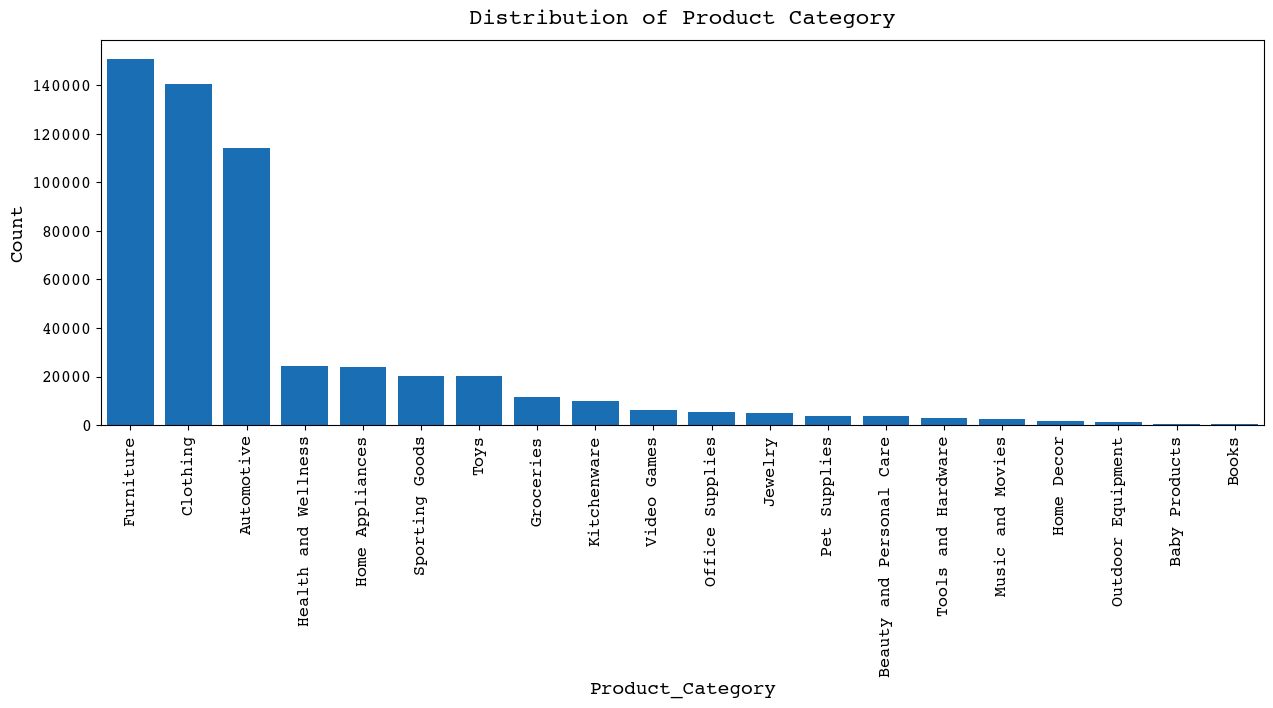

In [759]:
fig=plt.figure(figsize=(15,5))
data_t = get_value_count_df(df,"Product_Category")
ax = sns.barplot(data=data_t, x=data_t["Parameter Value"], y=data_t["Parameter Value Count"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Product_Category", fontsize = 14, fontname='Courier')
plt.ylabel("Count", fontsize = 14, fontname='Courier')
plt.title("Distribution of Product Category", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

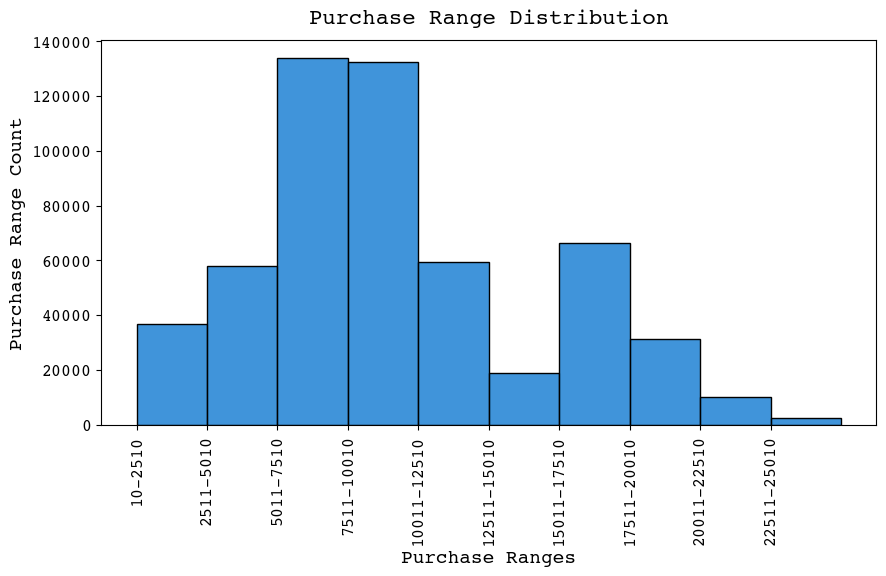

In [760]:
bins = [10, 2510, 5010, 7510, 10010, 12510, 15010, 17510, 20010, 22510, 25010]
labels=["10-2510", "2511-5010", "5011-7510", "7511-10010", "10011-12510", "12511-15010", "15011-17510", "17511-20010", "20011-22510", "22511-25010"]
fig=plt.figure(figsize=(10,5))
sns.histplot(df["Purchase"], bins = bins, color=plot_palette[0])
plt.xticks(bins[:-1], labels)
plt.xticks(fontsize = 12, fontname='Courier', rotation = 90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Purchase Ranges", fontsize = 14, fontname='Courier')
plt.ylabel("Purchase Range Count", fontsize = 14, fontname='Courier')
plt.title("Purchase Range Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

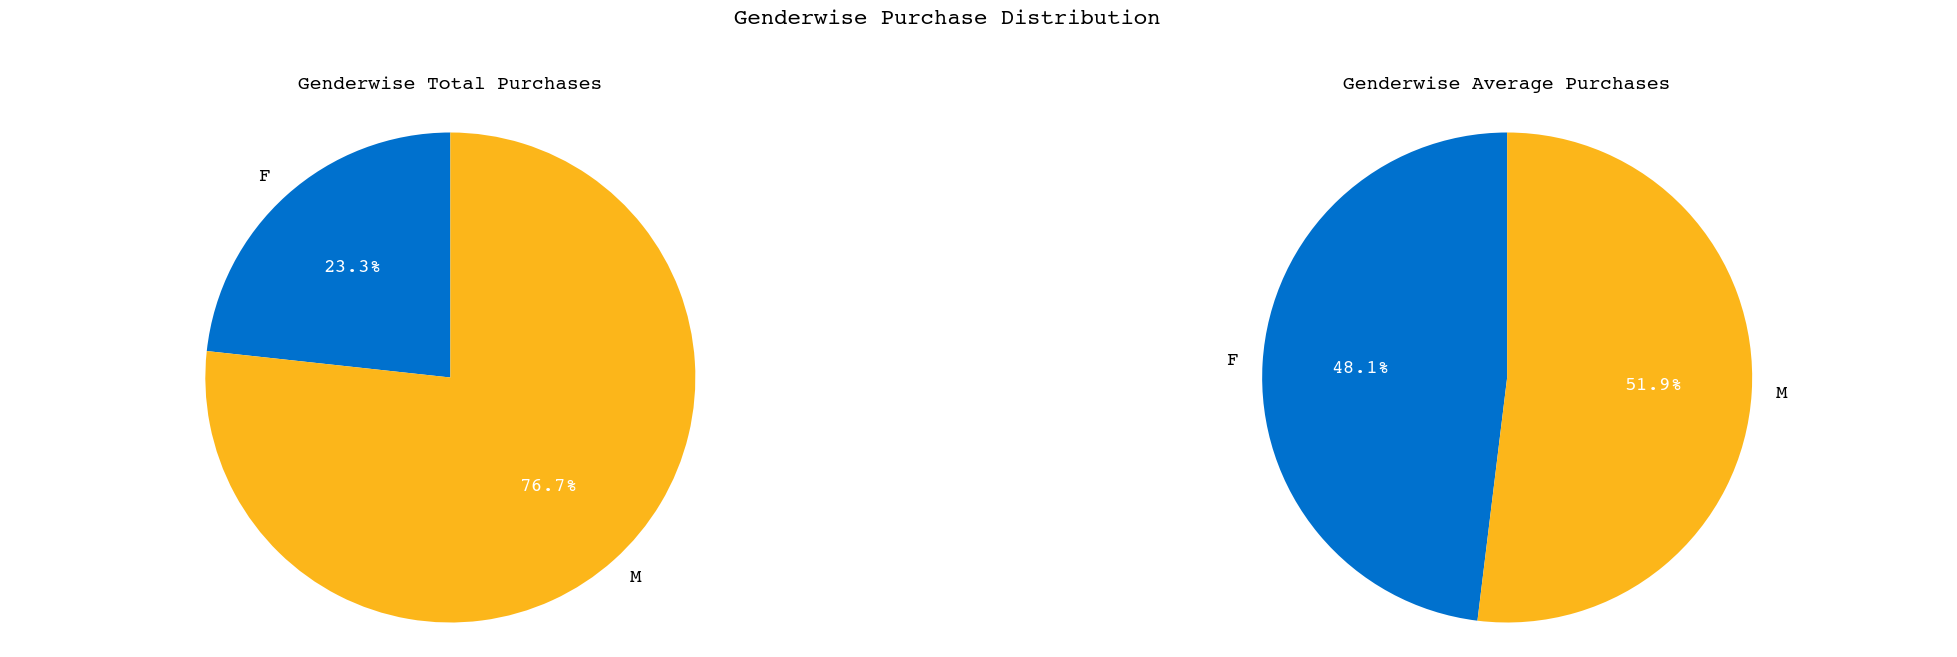

In [761]:
plt.figure(figsize=(25, 7)).suptitle("Genderwise Purchase Distribution", y=1.02, fontsize = 16, fontname='Courier')

plt.subplot(1,2,1)
t_df = df.groupby("Gender")["Purchase"].sum().reset_index()
labels = t_df["Gender"]
sizes = t_df["Purchase"]
colors = plot_palette[0:2]
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
for autotext in autotexts:
    autotext.set_color('white')
plt.axis('equal')
plt.title("Genderwise Total Purchases", y=1.02, fontsize = 14, fontname='Courier')

plt.subplot(1,2,2)
t_df = df.groupby("Gender")["Purchase"].mean().reset_index()
labels = t_df["Gender"]
sizes = t_df["Purchase"]
colors = plot_palette[0:2]
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
for autotext in autotexts:
    autotext.set_color('white')
plt.axis('equal')
plt.title("Genderwise Average Purchases", y=1.02, fontsize = 14, fontname='Courier')
plt.show()

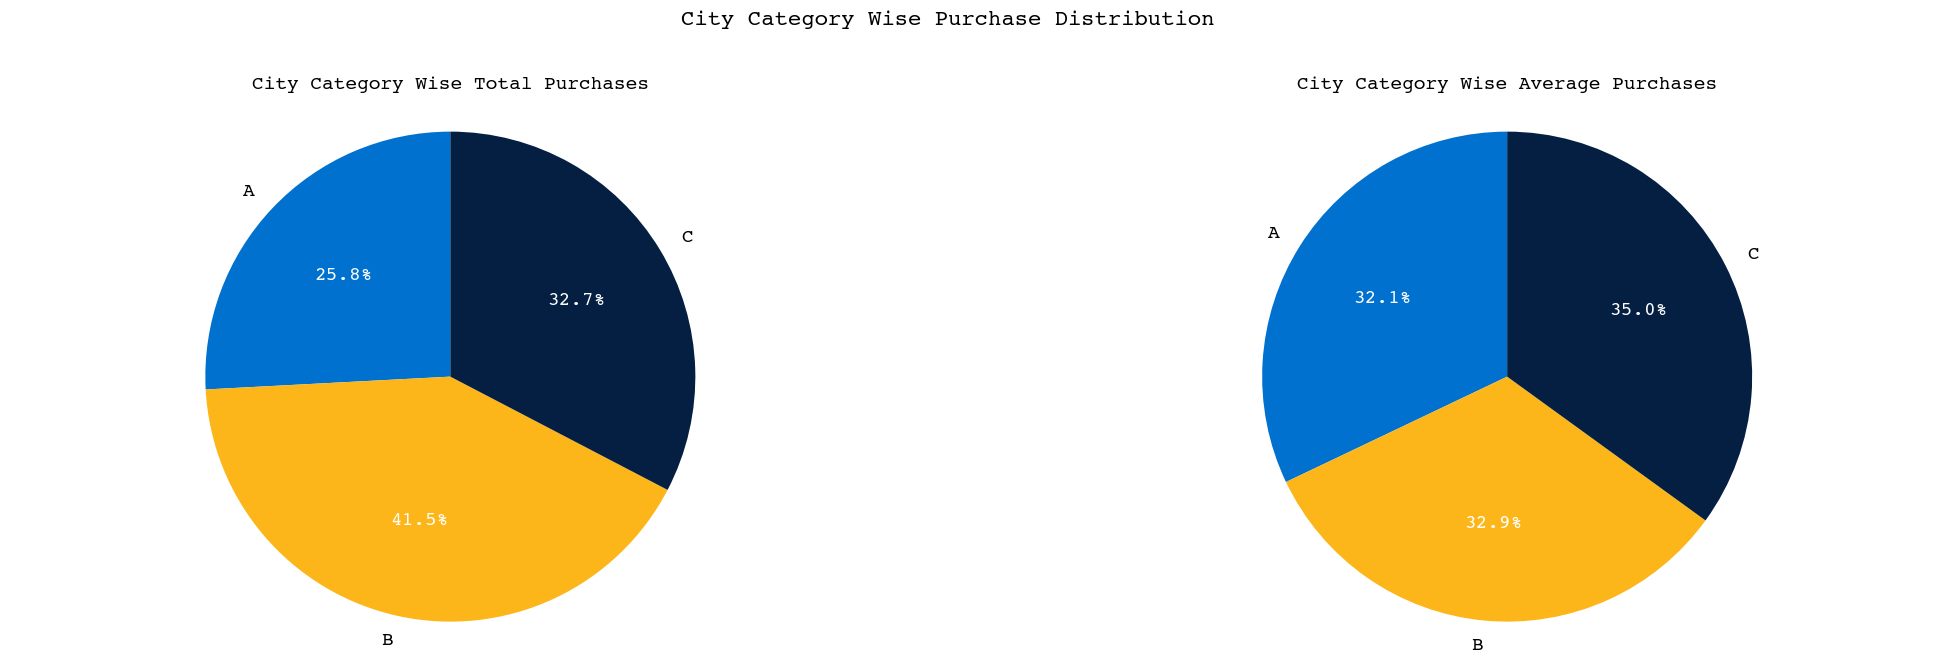

In [762]:
plt.figure(figsize=(25, 7)).suptitle("City Category Wise Purchase Distribution", y=1.02, fontsize = 16, fontname='Courier')

plt.subplot(1,2,1)
t_df = df.groupby("City_Category")["Purchase"].sum().reset_index()
labels = t_df["City_Category"]
sizes = t_df["Purchase"]
colors = plot_palette[0:3]
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
for autotext in autotexts:
    autotext.set_color('white')
plt.axis('equal')
plt.title("City Category Wise Total Purchases", y=1.02, fontsize = 14, fontname='Courier')

plt.subplot(1,2,2)
t_df = df.groupby("City_Category")["Purchase"].mean().reset_index()
labels = t_df["City_Category"]
sizes = t_df["Purchase"]
colors = plot_palette[0:3]
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
for autotext in autotexts:
    autotext.set_color('white')
plt.axis('equal')
plt.title("City Category Wise Average Purchases", y=1.02, fontsize = 14, fontname='Courier')
plt.show()

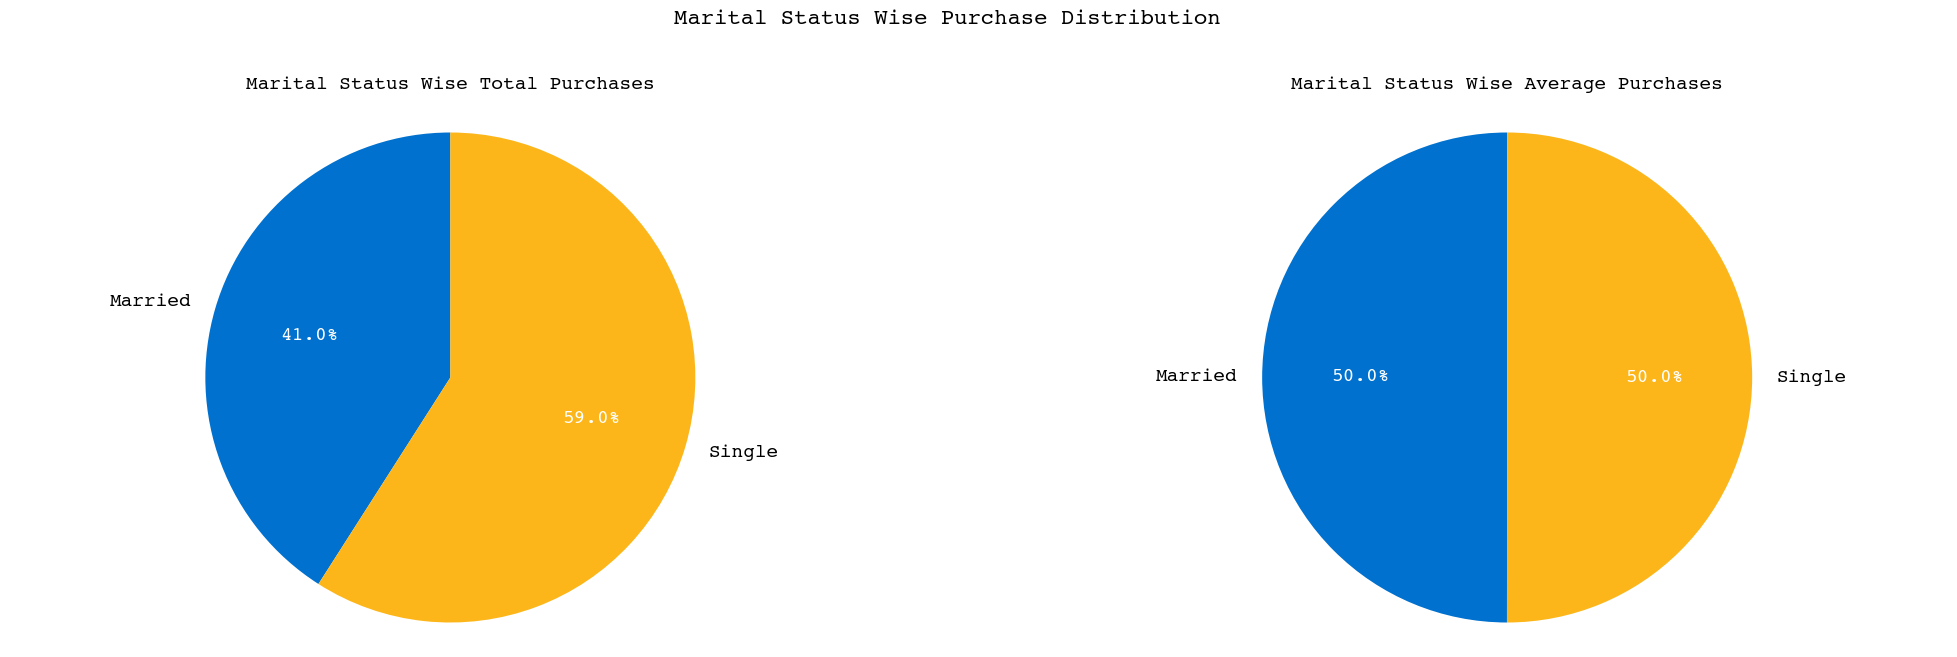

In [763]:
plt.figure(figsize=(25, 7)).suptitle("Marital Status Wise Purchase Distribution", y=1.02, fontsize = 16, fontname='Courier')

plt.subplot(1,2,1)
t_df = df.groupby("Marital_Status")["Purchase"].sum().reset_index()
labels = t_df["Marital_Status"]
sizes = t_df["Purchase"]
colors = plot_palette[0:2]
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
for autotext in autotexts:
    autotext.set_color('white')
plt.axis('equal')
plt.title("Marital Status Wise Total Purchases", y=1.02, fontsize = 14, fontname='Courier')

plt.subplot(1,2,2)
t_df = df.groupby("Marital_Status")["Purchase"].mean().reset_index()
labels = t_df["Marital_Status"]
sizes = t_df["Purchase"]
colors = plot_palette[0:2]
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'font':'Courier', 'size':'14'})
for autotext in autotexts:
    autotext.set_color('white')
plt.axis('equal')
plt.title("Marital Status Wise Average Purchases", y=1.02, fontsize = 14, fontname='Courier')
plt.show()

In [764]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

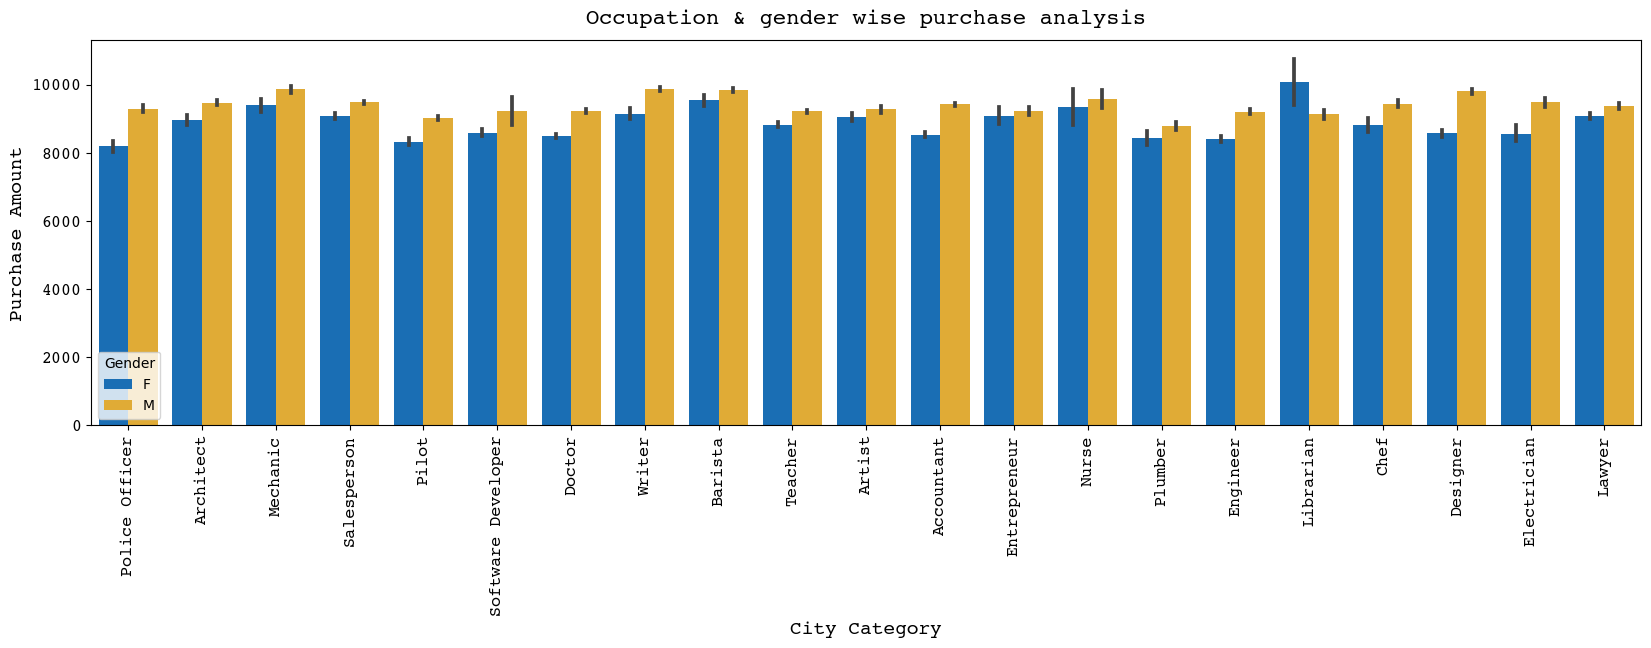

In [765]:
fig=plt.figure(figsize=(20,5))
ax = sns.barplot(data=df, x="Occupation", y="Purchase", hue="Gender", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("City Category", fontsize = 14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize = 14, fontname='Courier')
plt.title("Occupation & gender wise purchase analysis", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

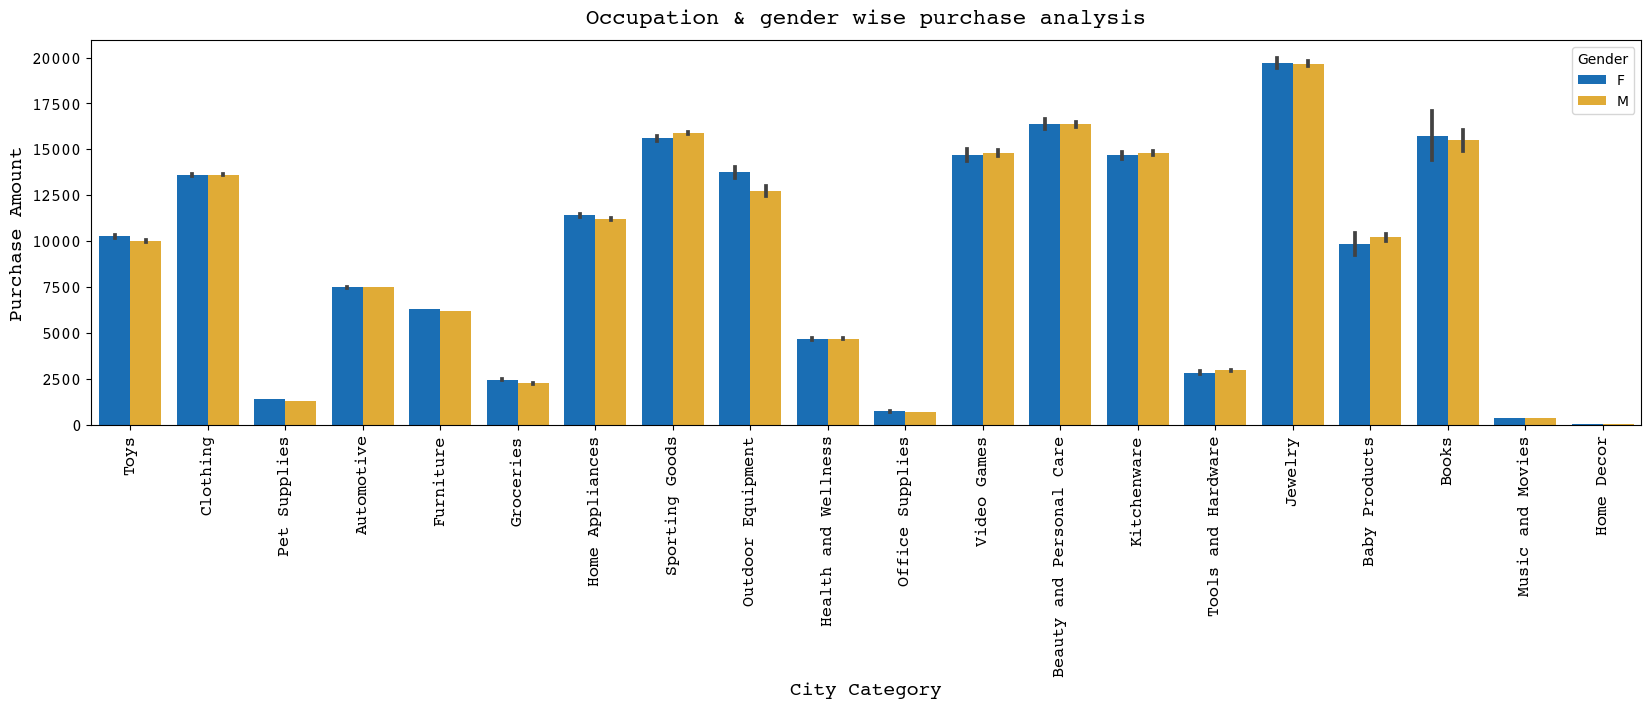

In [766]:
fig=plt.figure(figsize=(20,5))
ax = sns.barplot(data=df, x="Product_Category", y="Purchase", hue="Gender", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("City Category", fontsize = 14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize = 14, fontname='Courier')
plt.title("Occupation & gender wise purchase analysis", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

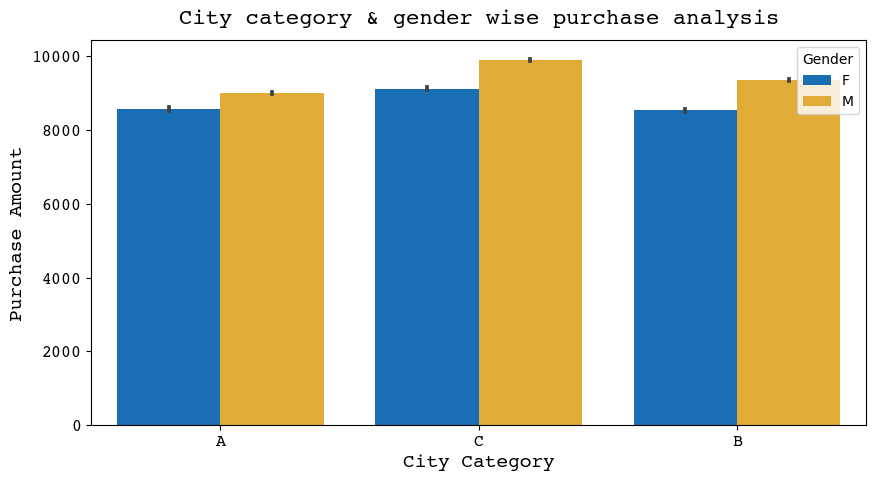

In [767]:
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x="City_Category", y="Purchase", hue="Gender", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("City Category", fontsize = 14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize = 14, fontname='Courier')
plt.title("City category & gender wise purchase analysis", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

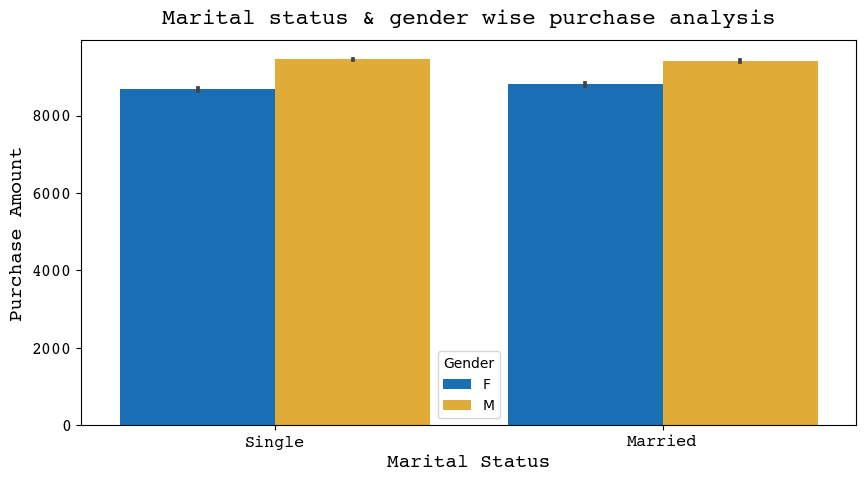

In [768]:
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x="Marital_Status", y="Purchase", hue="Gender", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Marital Status", fontsize = 14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize = 14, fontname='Courier')
plt.title("Marital status & gender wise purchase analysis", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

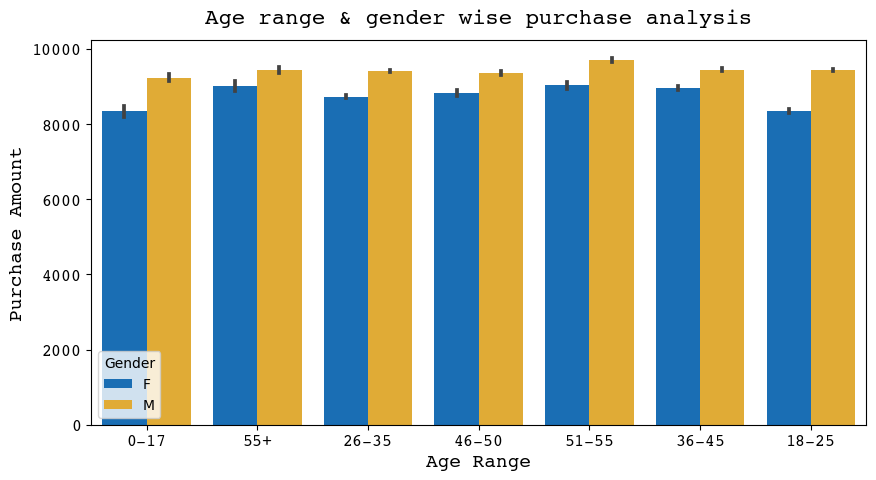

In [769]:
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x="Age", y="Purchase", hue="Gender", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Age Range", fontsize = 14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize = 14, fontname='Courier')
plt.title("Age range & gender wise purchase analysis", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

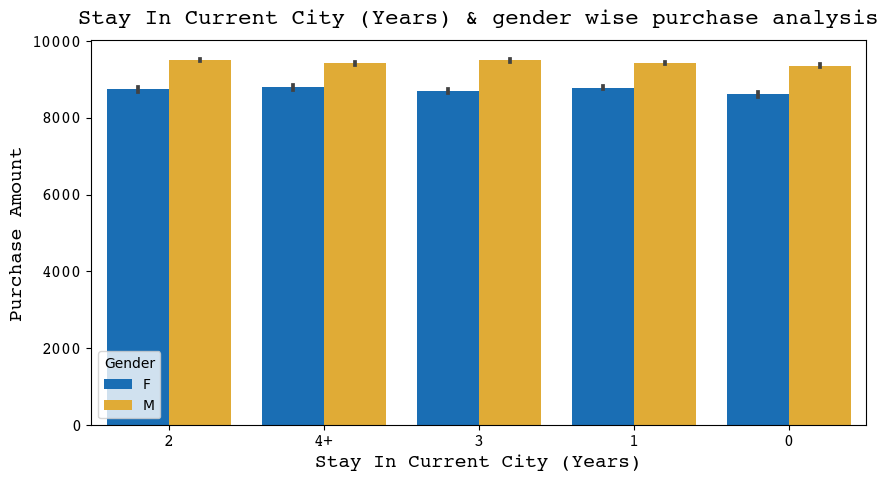

In [770]:
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", hue="Gender", palette=plot_palette)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Stay In Current City (Years)", fontsize = 14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize = 14, fontname='Courier')
plt.title("Stay In Current City (Years) & gender wise purchase analysis", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

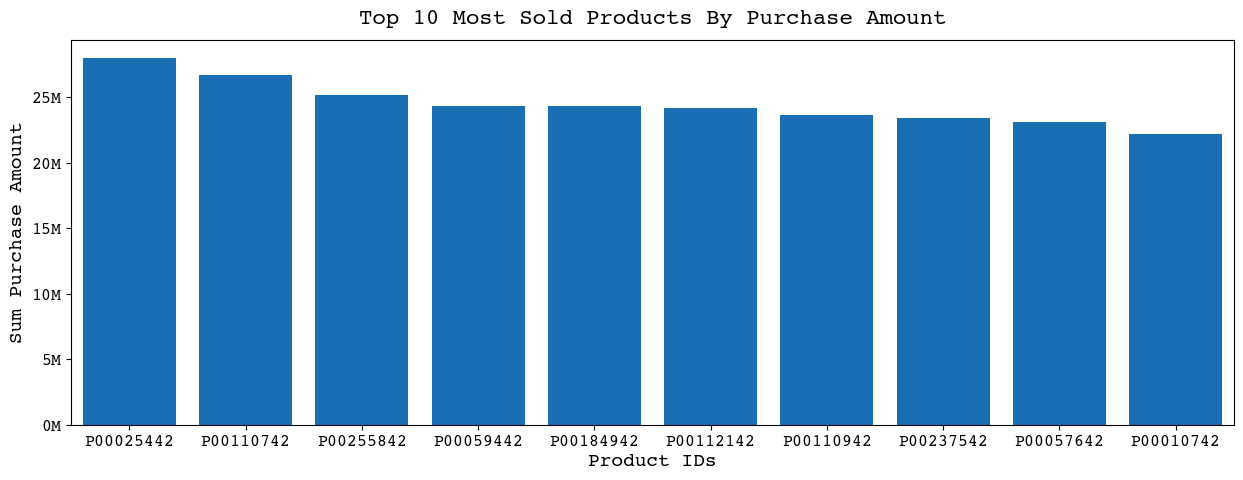

In [771]:
fig=plt.figure(figsize=(15,5))
data_t = df.groupby("Product_ID")["Purchase"].sum().reset_index().sort_values("Purchase", ascending=False).head(10)
ax = sns.barplot(data=data_t, x=data_t["Product_ID"], y=data_t["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Product IDs", fontsize = 14, fontname='Courier')
plt.ylabel("Sum Purchase Amount", fontsize = 14, fontname='Courier')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))
plt.title("Top 10 Most Sold Products By Purchase Amount", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

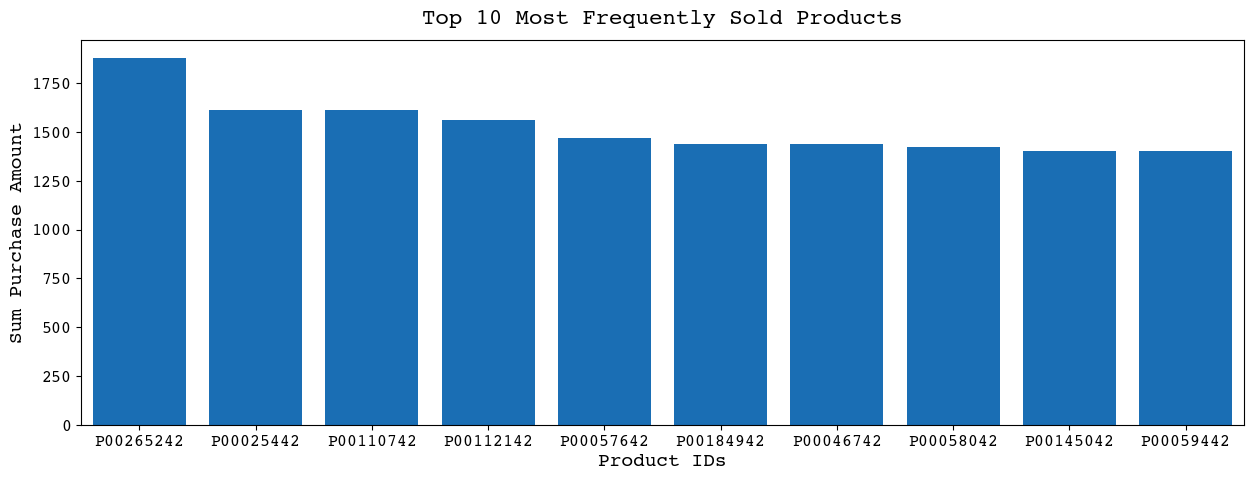

In [772]:
fig=plt.figure(figsize=(15,5))
data_t = df.groupby("Product_ID")["Purchase"].count().reset_index().sort_values("Purchase", ascending=False).head(10)
ax = sns.barplot(data=data_t, x=data_t["Product_ID"], y=data_t["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Product IDs", fontsize = 14, fontname='Courier')
plt.ylabel("Sum Purchase Amount", fontsize = 14, fontname='Courier')
plt.title("Top 10 Most Frequently Sold Products", y=1.02, fontsize = 16, fontname='Courier')
plt.show()

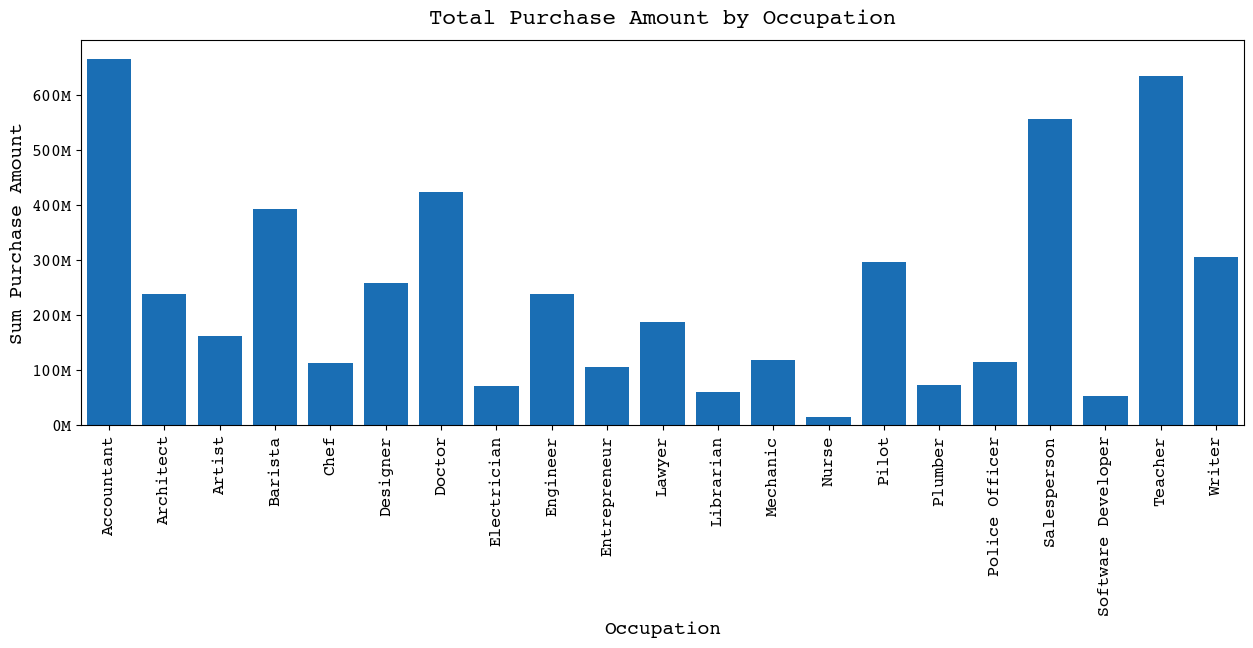

In [773]:
fig=plt.figure(figsize=(15,5))
data_t = df.groupby("Occupation")["Purchase"].sum().reset_index()
ax = sns.barplot(data=data_t, x=data_t["Occupation"], y=data_t["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Occupation", fontsize = 14, fontname='Courier')
plt.ylabel("Sum Purchase Amount", fontsize = 14, fontname='Courier')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))
plt.title("Total Purchase Amount by Occupation", y=1.02, fontsize=16, fontname='Courier')
plt.show()

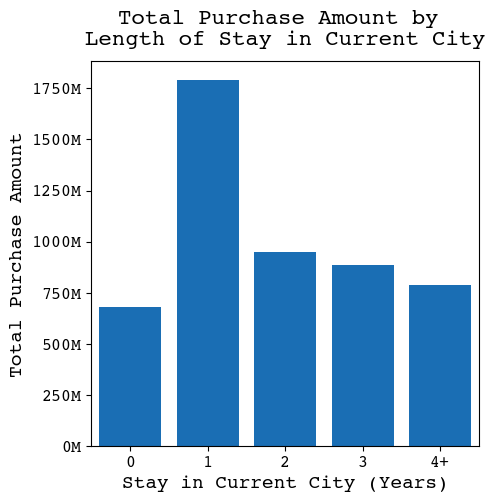

In [774]:
fig = plt.figure(figsize=(5, 5))
data_t = df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().reset_index()
ax = sns.barplot(data=data_t, x=data_t["Stay_In_Current_City_Years"], y=data_t["Purchase"], color=plot_palette[0])
plt.xticks(fontsize=12, fontname='Courier')
plt.yticks(fontsize=12, fontname='Courier')
plt.xlabel("Stay in Current City (Years)", fontsize=14, fontname='Courier')
plt.ylabel("Total Purchase Amount", fontsize=14, fontname='Courier')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))
plt.title("Total Purchase Amount by \nLength of Stay in Current City", y=1.02, fontsize=16, fontname='Courier')
plt.show()


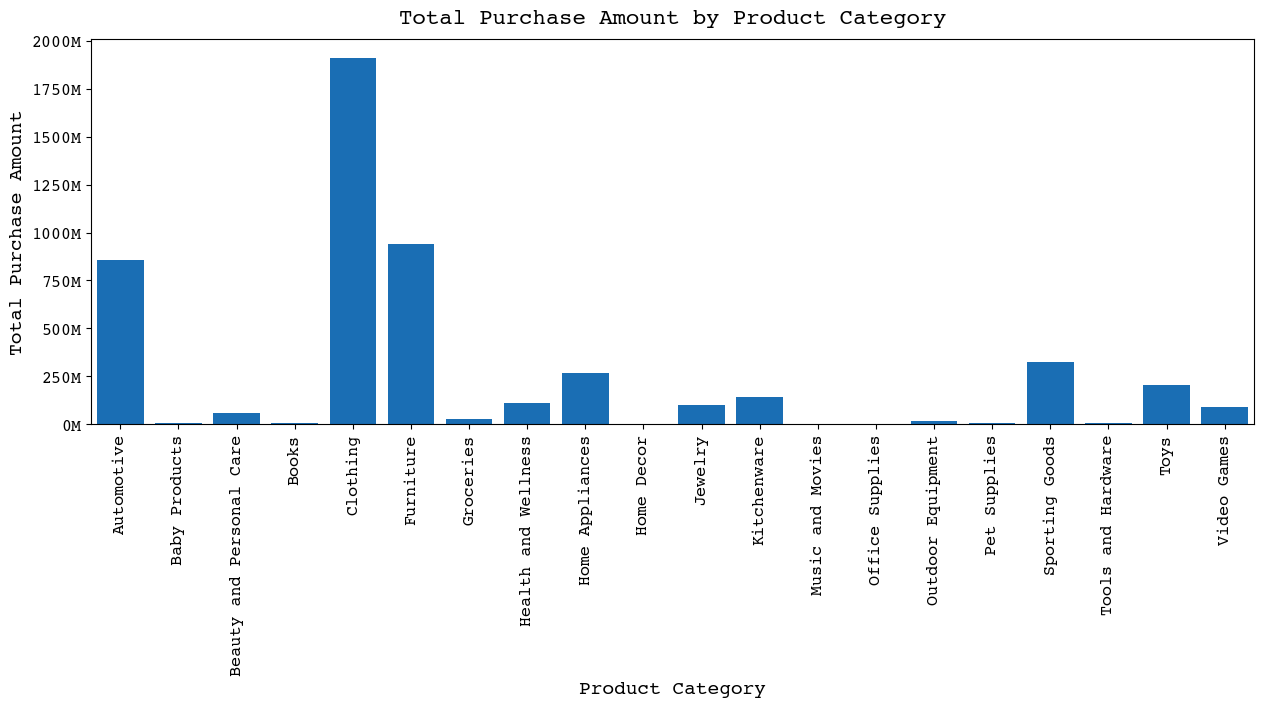

In [775]:
fig = plt.figure(figsize=(15, 5))
data_t = df.groupby("Product_Category")["Purchase"].sum().reset_index()
ax = sns.barplot(data=data_t, x=data_t["Product_Category"], y=data_t["Purchase"], color=plot_palette[0])
plt.xticks(fontsize=12, fontname='Courier', rotation=90)
plt.yticks(fontsize=12, fontname='Courier')
plt.xlabel("Product Category", fontsize=14, fontname='Courier')
plt.ylabel("Total Purchase Amount", fontsize=14, fontname='Courier')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))
plt.title("Total Purchase Amount by Product Category", y=1.02, fontsize=16, fontname='Courier')
plt.show()


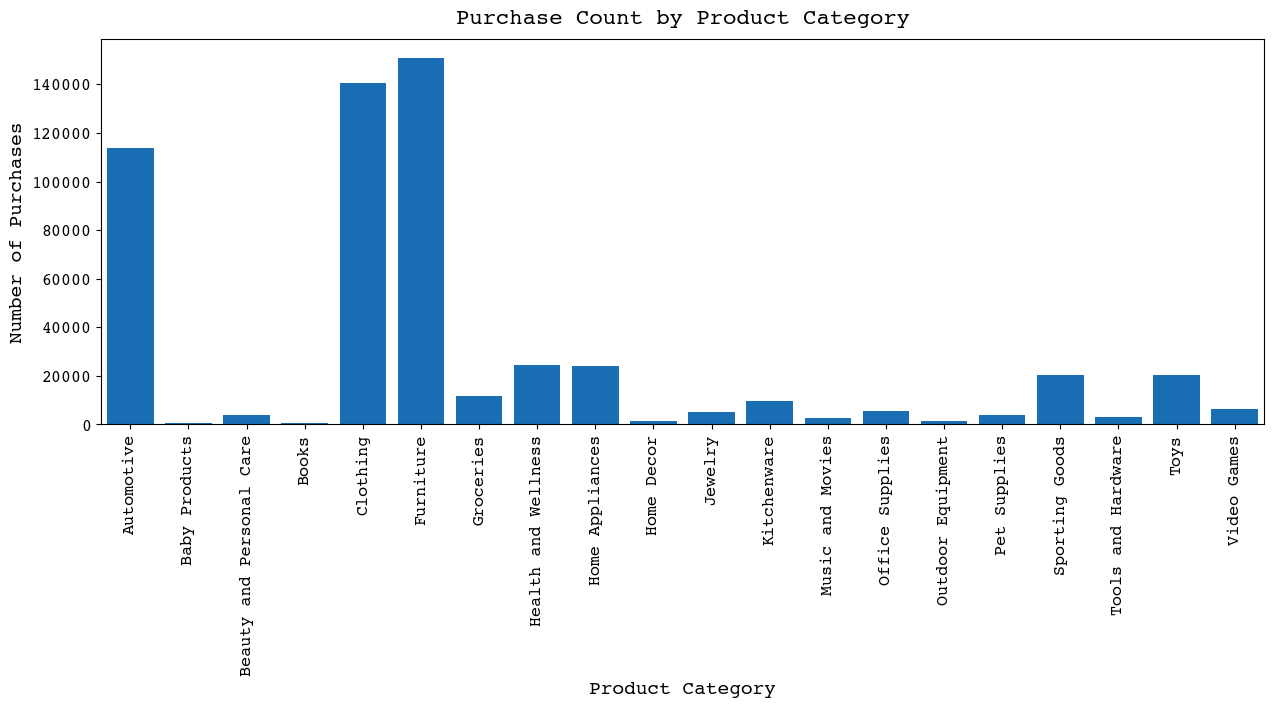

In [776]:
fig = plt.figure(figsize=(15, 5))
data_t = df.groupby("Product_Category")["Purchase"].count().reset_index()
ax = sns.barplot(data=data_t, x=data_t["Product_Category"], y=data_t["Purchase"], color=plot_palette[0])
plt.xticks(fontsize=12, fontname='Courier', rotation=90)
plt.yticks(fontsize=12, fontname='Courier')
plt.xlabel("Product Category", fontsize=14, fontname='Courier')
plt.ylabel("Number of Purchases", fontsize=14, fontname='Courier')
plt.title("Purchase Count by Product Category", y=1.02, fontsize=16, fontname='Courier')
plt.show()

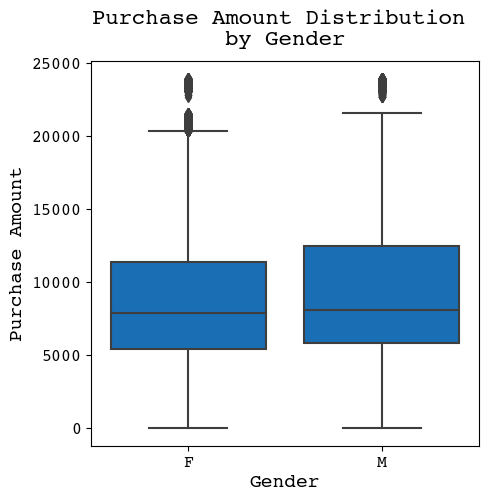

In [777]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x=df["Gender"], y=df["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Gender", fontsize=14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize=14, fontname='Courier')
plt.title("Purchase Amount Distribution \nby Gender", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [778]:
f_shop_data = df.loc[df["Gender"] == "F", "Purchase"]
m_shop_data = df.loc[df["Gender"] == "M", "Purchase"]

In [779]:
np.mean(f_shop_data).round(2), np.mean(m_shop_data).round(2)

(8734.57, 9437.53)

In [780]:
def get_confidence_interval(mean_samples, p_c, sample_size):
    sample_mu = np.mean(mean_samples)
    sample_sigma = np.std(mean_samples)

    std_err = sample_sigma//math.sqrt(sample_size)

    p1 = (1-p_c)/2
    p2 = p1+p_c

    z1 = norm.ppf(p1).round(4)
    z2 = norm.ppf(p2).round(4)

    x1 = sample_mu + (std_err*z1)
    x2 = sample_mu + (std_err*z2)

    return (np.round(x1,2), np.round(x2,2))    

In [781]:
def get_mean_samples(data, itr, sample_size):
    return data.sample(n=itr * sample_size, replace=True).values.reshape(-1, sample_size).mean(axis=1)

In [782]:
def calculate_outlier_bounds(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    return(lower_bound, upper_bound)

In [783]:
def are_ranges_overlapping(range1, range2):
    min_upper_bound = min(range1[1], range2[1])
    max_lower_bound = max(range1[0], range2[0])
    
    return max_lower_bound <= min_upper_bound

In [784]:
sample_size = 200
itr = 20000

f_mean_samples = get_mean_samples(f_shop_data, itr, sample_size)
m_mean_samples = get_mean_samples(m_shop_data, itr, sample_size)

In [785]:
p_c = 90/100

f_ci = get_confidence_interval(f_mean_samples, p_c, sample_size)
m_ci = get_confidence_interval(m_mean_samples, p_c, sample_size)

print(f_ci)
print(m_ci)

(8696.24, 8771.91)
(9396.22, 9478.47)


In [786]:
p_c = 95/100

f_ci = get_confidence_interval(f_mean_samples, p_c, sample_size)
m_ci = get_confidence_interval(m_mean_samples, p_c, sample_size)

print(f_ci)
print(m_ci)

(8689.0, 8779.16)
(9388.35, 9486.35)


In [787]:
p_c = 99/100

f_ci = get_confidence_interval(f_mean_samples, p_c, sample_size)
m_ci = get_confidence_interval(m_mean_samples, p_c, sample_size)

print(f_ci)
print(m_ci)

(8674.83, 8793.32)
(9372.95, 9501.74)


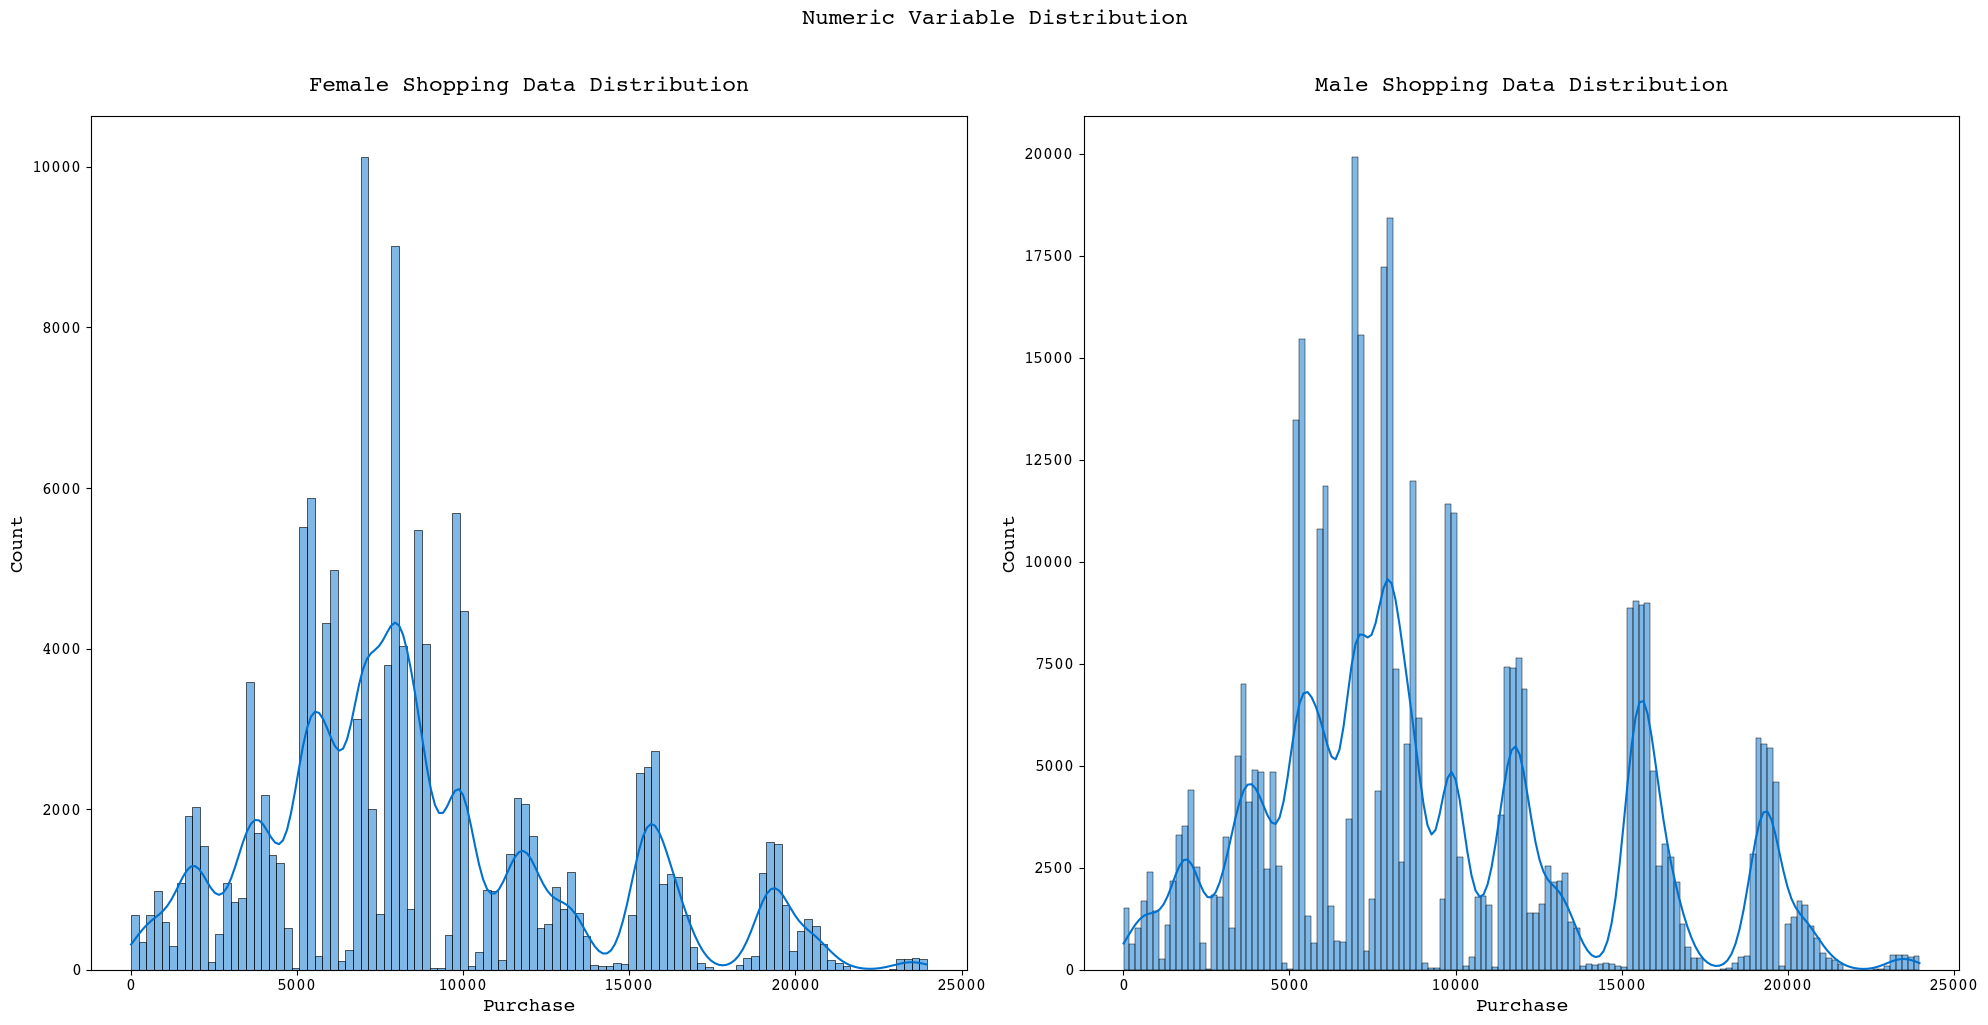

In [788]:
num_cols = df.select_dtypes(include='int64').columns
fig=plt.figure(figsize=(20,10)).suptitle("Numeric Variable Distribution", y=1.02, fontsize = 16, fontname='Courier')
for i in range(num_cols.size):
    plt.subplot(1,2,1)
    sns.histplot(f_shop_data, kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(num_cols[i], fontsize = 14, fontname='Courier')
    plt.ylabel("Count", fontsize = 14, fontname='Courier')
    plt.title("Female Shopping Data Distribution", y=1.02, fontsize = 16, fontname='Courier')

    plt.subplot(1,2,2)
    sns.histplot(m_shop_data, kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(num_cols[i], fontsize = 14, fontname='Courier')
    plt.ylabel("Count", fontsize = 14, fontname='Courier')
    plt.title("Male Shopping Data Distribution", y=1.02, fontsize = 16, fontname='Courier')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [789]:
H0 = "There is no significant difference in the average shopping done by males and females."
Ha = "There is a significant difference in the average shopping done by males and females."

alpha = 0.05

f_stats, p_value = kruskal(
    f_shop_data, m_shop_data
    )

print(f_stats, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

1629.0673312259069 0.0
Reject H0,  There is a significant difference in the average shopping done by males and females.


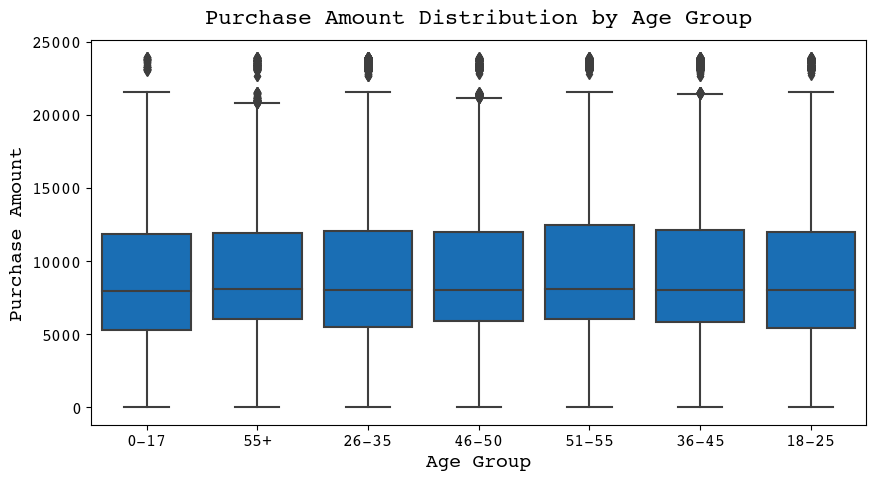

In [790]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Age"], y=df["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Age Group", fontsize=14, fontname='Courier') 
plt.ylabel("Purchase Amount", fontsize=14, fontname='Courier') 
plt.title("Purchase Amount Distribution by Age Group", y=1.02, fontsize=16, fontname='Courier') 
plt.show()

In [791]:
age_wise_dt = []
unique_age_ranges = df["Age"].unique()
print(unique_age_ranges)
for age_range in unique_age_ranges:
    age_wise_dt.append(df.loc[df["Age"] == age_range, "Purchase"])

for age_data in age_wise_dt:
    print(age_data.mean().round(2), end = ", ")

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
8933.46, 9336.28, 9252.69, 9208.63, 9534.81, 9331.35, 9169.66, 

In [792]:
sample_size = 200
itr = 20000

age_wise_mean_samples = []

for age_data in age_wise_dt:
    age_wise_mean_samples.append(get_mean_samples(age_data, itr, sample_size))

In [793]:
p_c = 90/100

age_wise_ci = []

for age_wise_mean_sample in age_wise_mean_samples:
    age_wise_ci.append(get_confidence_interval(age_wise_mean_sample, p_c, sample_size))

print(unique_age_ranges)
print(age_wise_ci)

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[(8890.79, 8973.04), (9295.02, 9377.27), (9213.47, 9292.43), (9170.64, 9249.6), (9496.27, 9578.51), (9294.01, 9376.25), (9127.75, 9210.0)]


In [794]:
p_c = 95/100

age_wise_ci = []

for age_wise_mean_sample in age_wise_mean_samples:
    age_wise_ci.append(get_confidence_interval(age_wise_mean_sample, p_c, sample_size))

print(unique_age_ranges)
print(age_wise_ci)

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[(8882.92, 8980.92), (9287.14, 9385.14), (9205.91, 9299.99), (9163.08, 9257.16), (9488.39, 9586.39), (9286.13, 9384.13), (9119.88, 9217.88)]


In [795]:
p_c = 99/100

age_wise_ci = []

for age_wise_mean_sample in age_wise_mean_samples:
    age_wise_ci.append(get_confidence_interval(age_wise_mean_sample, p_c, sample_size))

print(unique_age_ranges)
print(age_wise_ci)

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[(8867.52, 8996.31), (9271.75, 9400.54), (9191.13, 9314.77), (9148.3, 9271.94), (9473.0, 9601.79), (9270.74, 9399.53), (9104.48, 9233.27)]


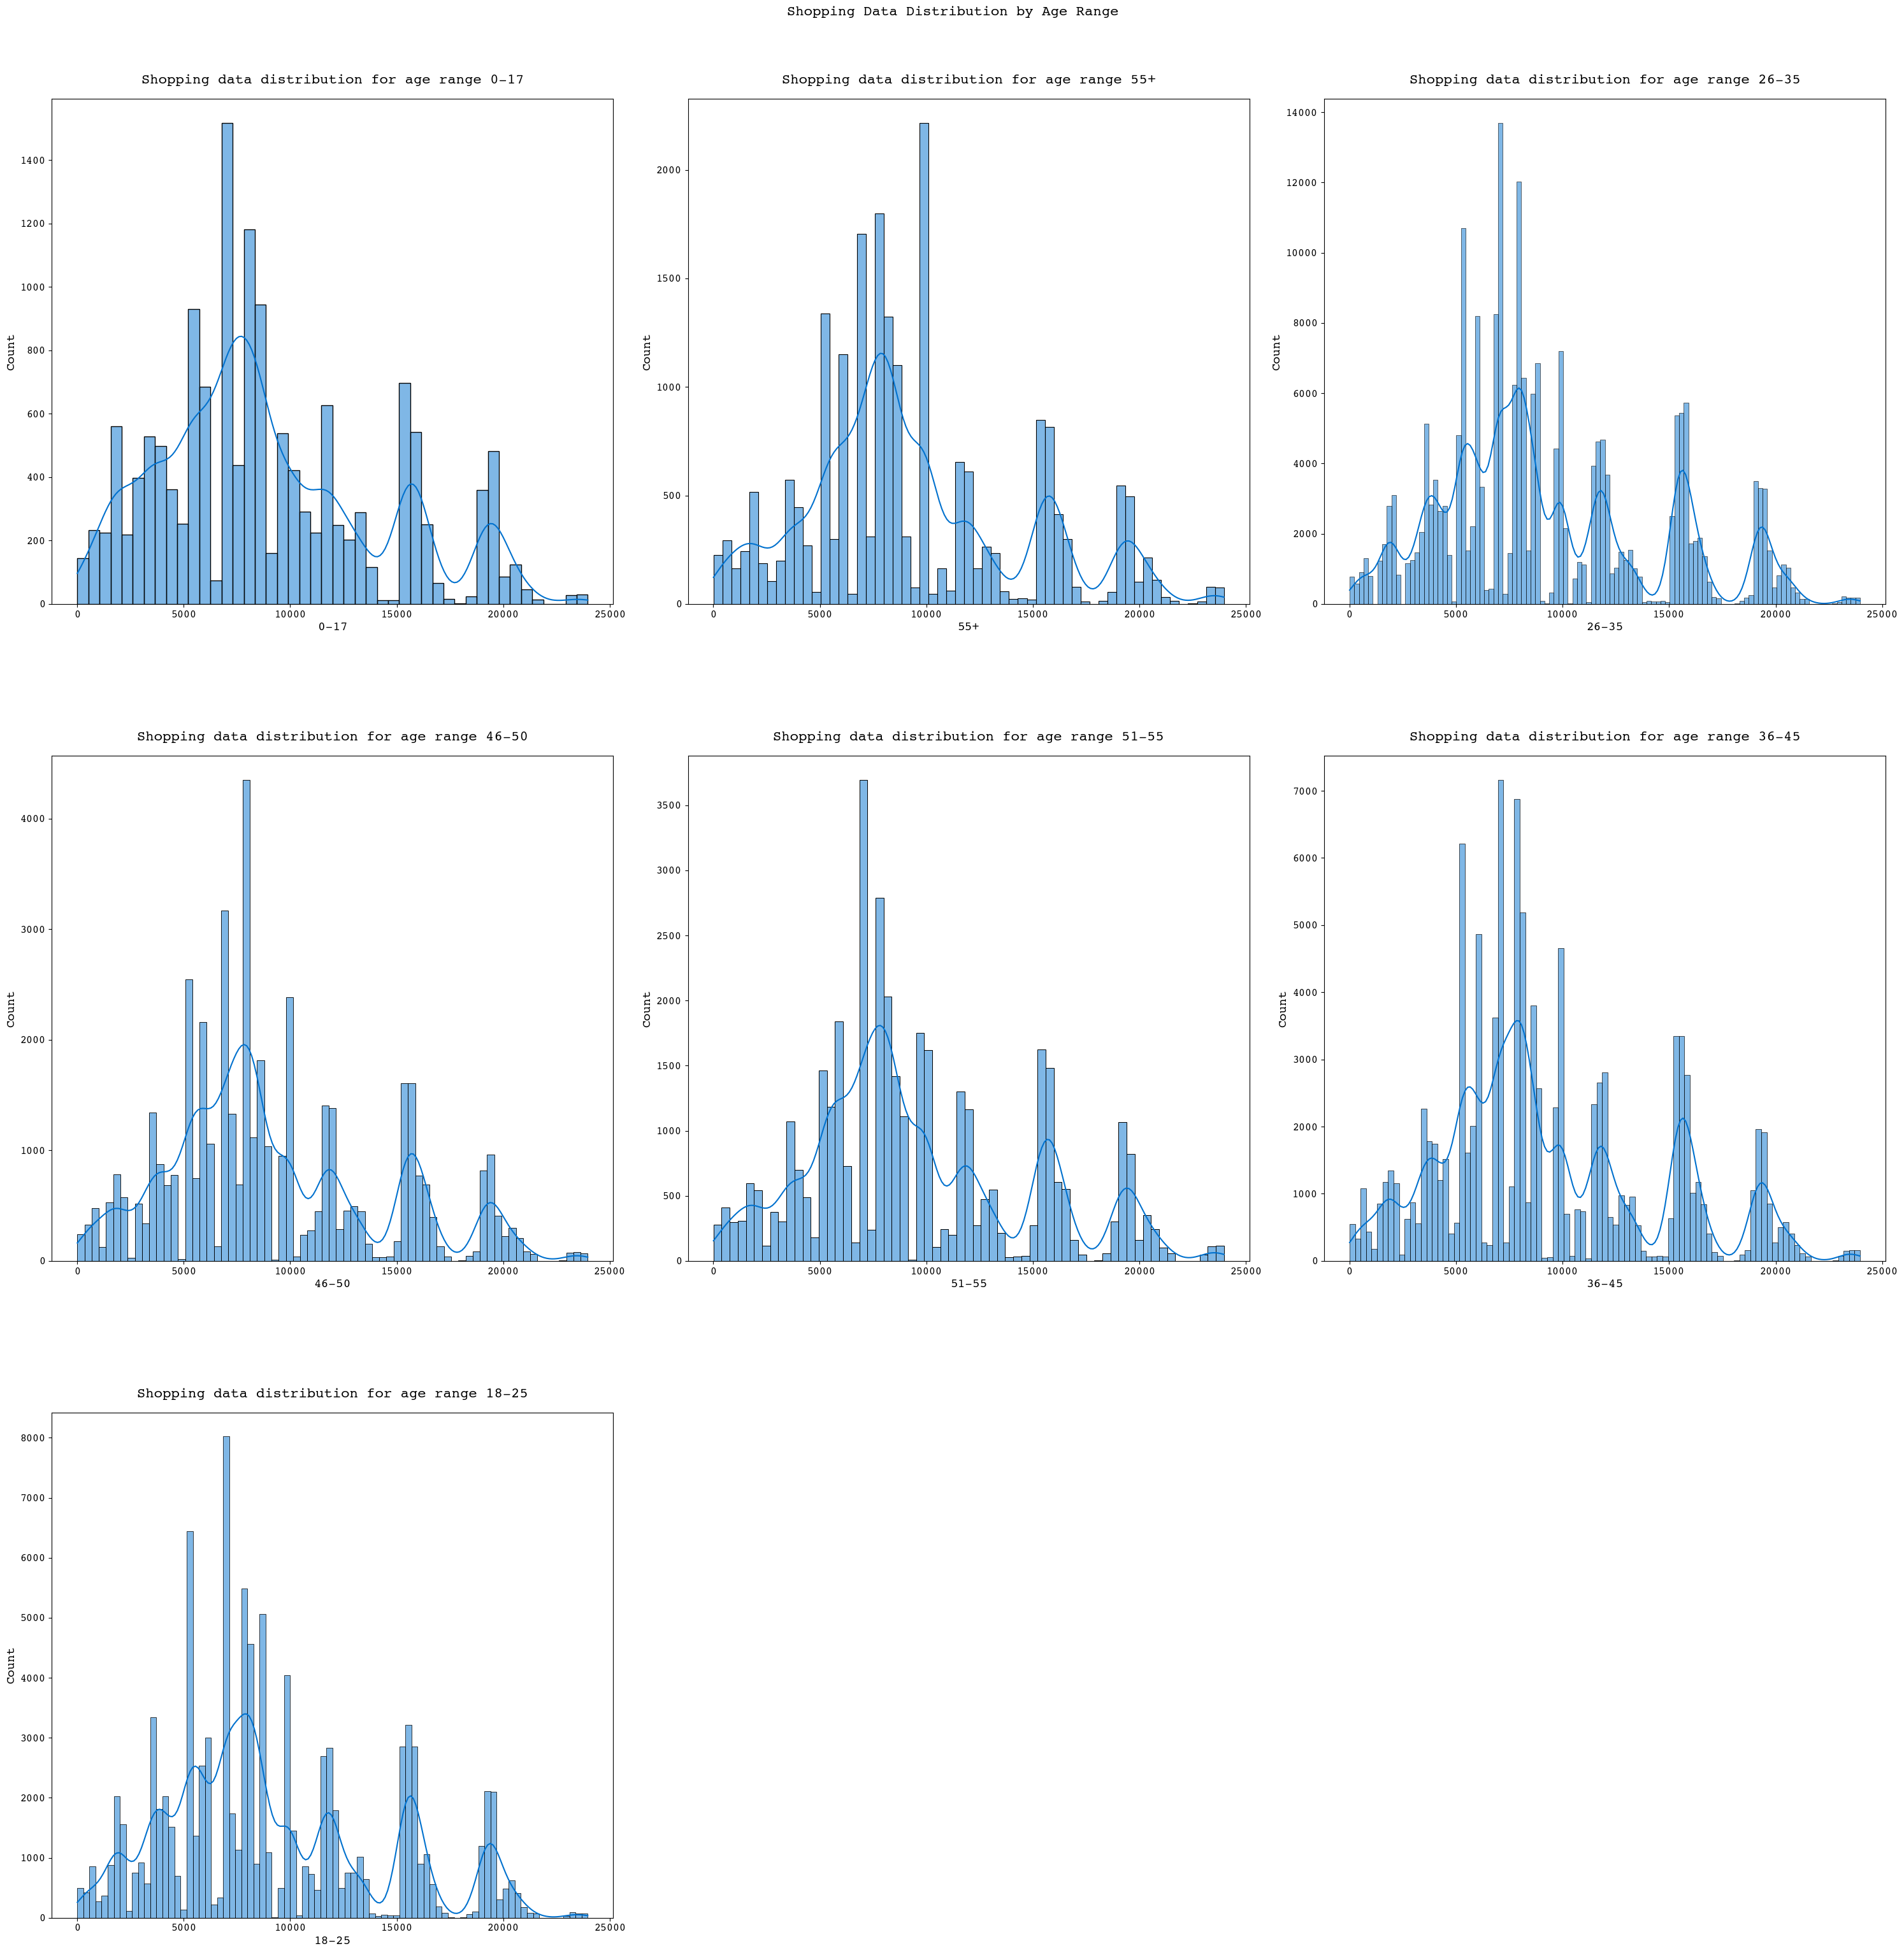

In [796]:
fig=plt.figure(figsize=(30,30)).suptitle("Shopping Data Distribution by Age Range", y=1.02, fontsize = 16, fontname='Courier')
for i,age_range in enumerate(unique_age_ranges):
    plt.subplot(3,3,i+1)
    sns.histplot(df.loc[df["Age"] == age_range, "Purchase"], kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(age_range, fontsize = 14, fontname='Courier')
    plt.ylabel("Count", fontsize = 14, fontname='Courier')
    plt.title("Shopping data distribution for age range "+ age_range, y=1.02, fontsize = 16, fontname='Courier')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [797]:
H0 = "There is no significant difference in the average shopping done by different age groups."
Ha = "There is a significant difference in the average shopping done by different age groups."

alpha = 0.05

f_stats, p_value = kruskal(
    age_wise_dt[0], age_wise_dt[1], age_wise_dt[2], age_wise_dt[3], age_wise_dt[4], age_wise_dt[5], age_wise_dt[6]
    )

print(f_stats, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

315.65242682849174 3.612251655399266e-65
Reject H0,  There is a significant difference in the average shopping done by different age groups.


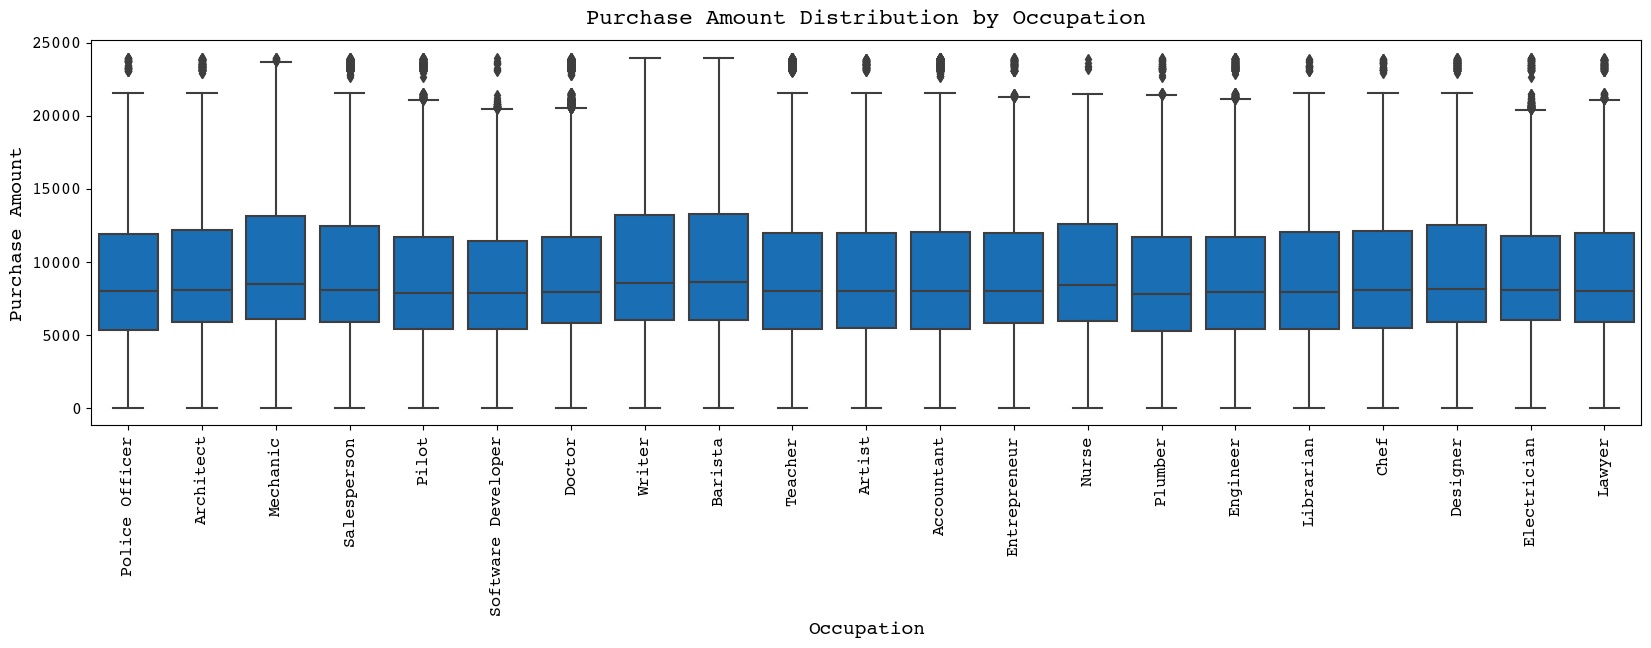

In [798]:
fig = plt.figure(figsize=(20, 5))
sns.boxplot(x=df["Occupation"], y=df["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Occupation", fontsize=14, fontname='Courier') 
plt.ylabel("Purchase Amount", fontsize=14, fontname='Courier') 
plt.title("Purchase Amount Distribution by Occupation", y=1.02, fontsize=16, fontname='Courier') 
plt.show()

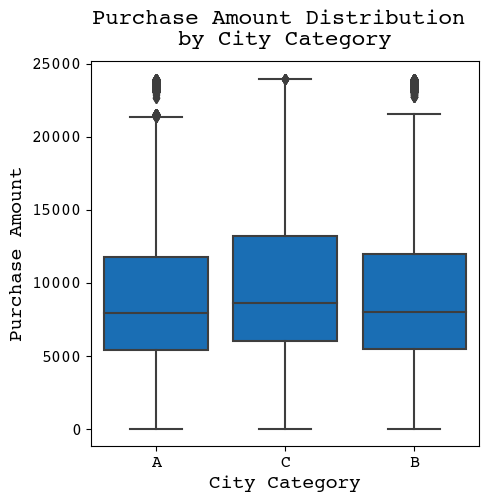

In [799]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x=df["City_Category"], y=df["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("City Category", fontsize=14, fontname='Courier') 
plt.ylabel("Purchase Amount", fontsize=14, fontname='Courier') 
plt.title("Purchase Amount Distribution \nby City Category", y=1.02, fontsize=16, fontname='Courier') 
plt.show()

In [800]:
city_category_data = []
unique_city_categories = df["City_Category"].unique()
print(unique_city_categories)
for city_category in unique_city_categories:
    city_category_data.append(df.loc[df["City_Category"] == city_category, "Purchase"])

city_category_data[0].mean().round(2), city_category_data[1].mean().round(2), city_category_data[2].mean().round(2)

['A' 'C' 'B']


(8911.94, 9719.92, 9151.3)

In [801]:
sample_size = 200
itr = 20000
city_categories_mean_samples = []
for city_category_dt in city_category_data:
    t = get_mean_samples(city_category_dt, itr, sample_size)
    city_categories_mean_samples.append(t)

In [802]:
p_c = 90/100
city_category_wise_ci = []
for city_category_mean_sample in city_categories_mean_samples:
    city_category_wise_ci.append(get_confidence_interval(city_category_mean_sample, p_c, sample_size))
print(unique_city_categories)
print(city_category_wise_ci)

['A' 'C' 'B']
[(8874.42, 8953.38), (9679.18, 9764.71), (9115.42, 9194.38)]


In [803]:
p_c = 95/100
city_category_wise_ci = []
for city_category_mean_sample in city_categories_mean_samples:
    city_category_wise_ci.append(get_confidence_interval(city_category_mean_sample, p_c, sample_size))
print(unique_city_categories)
print(city_category_wise_ci)

['A' 'C' 'B']
[(8866.86, 8960.94), (9670.99, 9772.91), (9107.86, 9201.94)]


In [804]:
p_c = 99/100
city_category_wise_ci = []
for city_category_mean_sample in city_categories_mean_samples:
    city_category_wise_ci.append(get_confidence_interval(city_category_mean_sample, p_c, sample_size))
print(unique_city_categories)
print(city_category_wise_ci)

['A' 'C' 'B']
[(8852.08, 8975.72), (9654.98, 9788.92), (9093.08, 9216.72)]


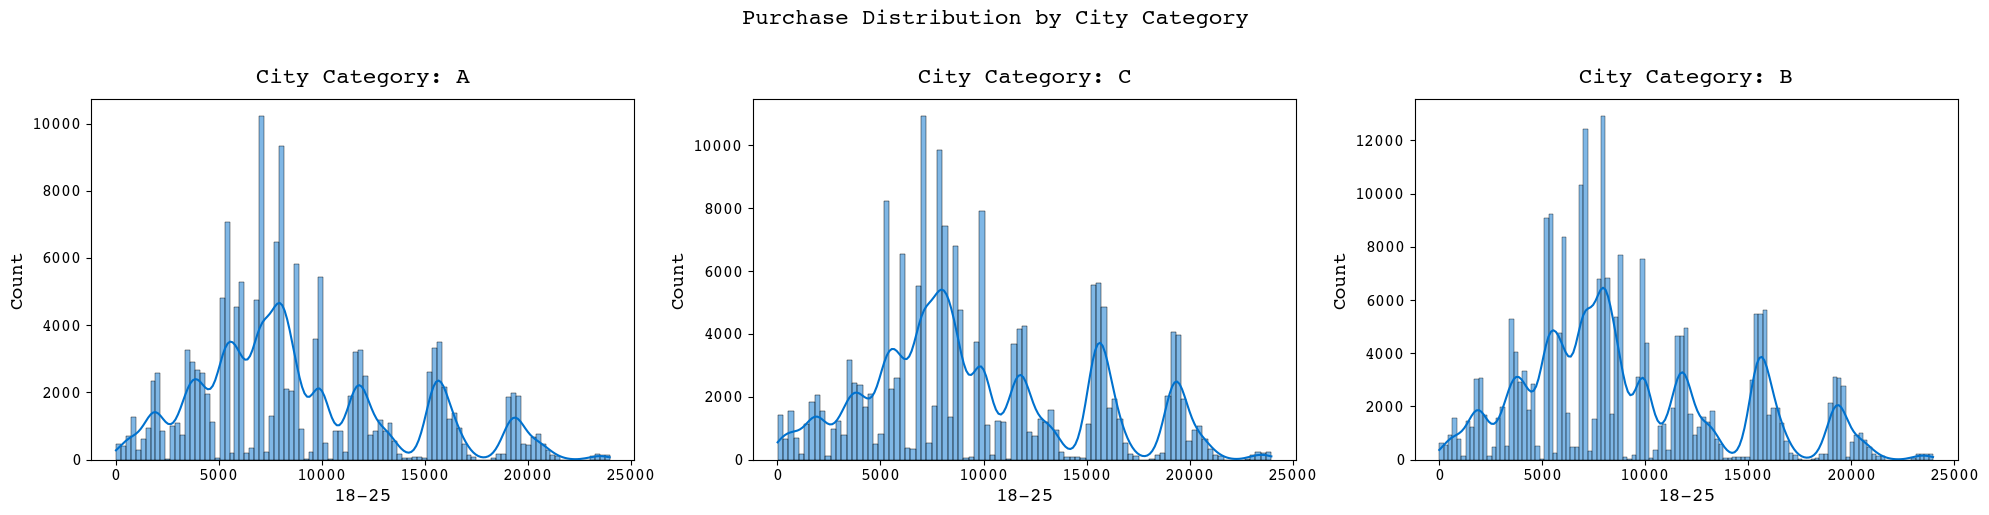

In [805]:
fig=plt.figure(figsize=(20,5)).suptitle("Purchase Distribution by City Category", y=1.02, fontsize = 16, fontname='Courier')
for i,city_category in enumerate(unique_city_categories):
    plt.subplot(1,3,i+1)
    sns.histplot(df.loc[df["City_Category"] == city_category, "Purchase"], kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(age_range, fontsize = 14, fontname='Courier')
    plt.ylabel("Count", fontsize = 14, fontname='Courier')
    plt.title("City Category: " + city_category, y=1.02, fontsize = 16, fontname='Courier')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [806]:
H0 = "There is no significant difference in the average shopping done by customers from different city groups."
Ha = "There is a significant difference in the average shopping done by customers from different city groups."

alpha = 0.05

f_stats, p_value = kruskal(
    city_category_data[0], city_category_data[1], city_category_data[2]
    )

print(f_stats, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

2303.7127322648357 0.0
Reject H0,  There is a significant difference in the average shopping done by customers from different city groups.


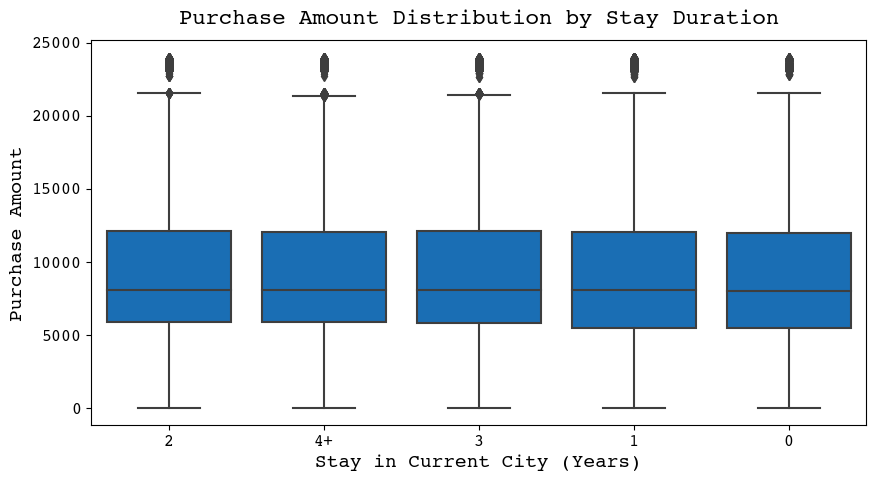

In [807]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Stay_In_Current_City_Years"], y=df["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Stay in Current City (Years)", fontsize=14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize=14, fontname='Courier')
plt.title("Purchase Amount Distribution by Stay Duration", y=1.02, fontsize=16, fontname='Courier')
plt.show()

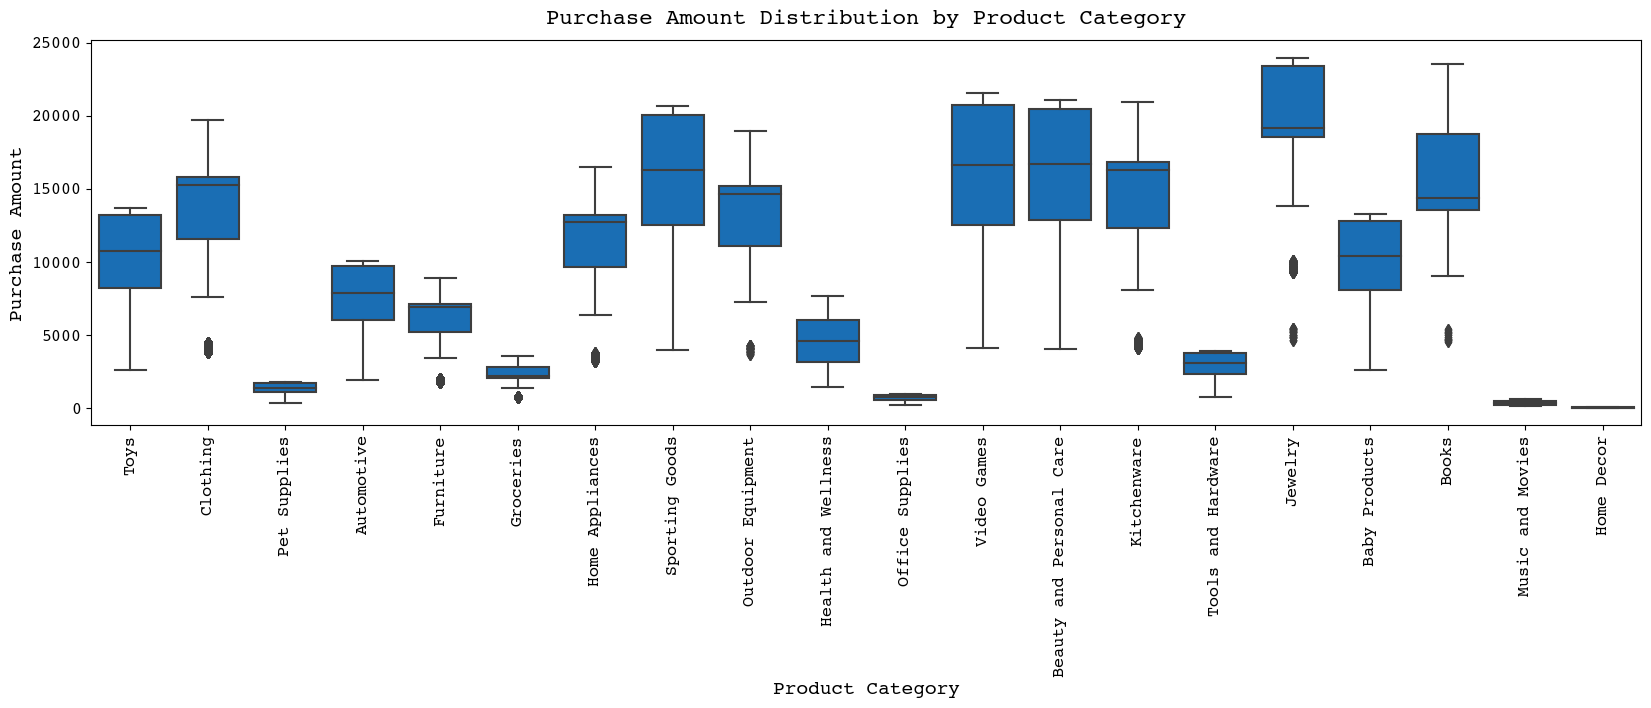

In [808]:
fig = plt.figure(figsize=(20, 5))
sns.boxplot(x=df["Product_Category"], y=df["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier', rotation=90)
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Product Category", fontsize=14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize=14, fontname='Courier')
plt.title("Purchase Amount Distribution by Product Category", y=1.02, fontsize=16, fontname='Courier')
plt.show()

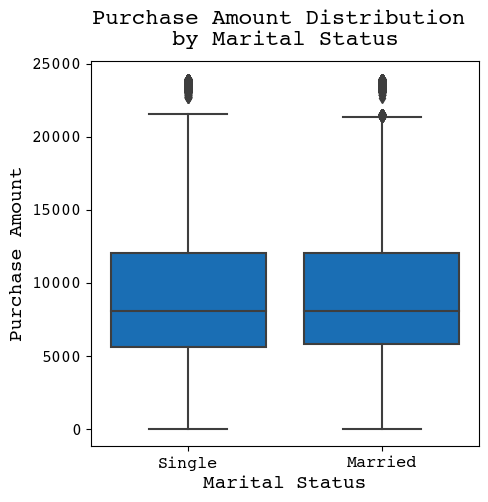

In [809]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x=df["Marital_Status"], y=df["Purchase"], color=plot_palette[0])
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.xlabel("Marital Status", fontsize=14, fontname='Courier')
plt.ylabel("Purchase Amount", fontsize=14, fontname='Courier')
plt.title("Purchase Amount Distribution \nby Marital Status", y=1.02, fontsize=16, fontname='Courier')
plt.show()

In [810]:
marital_status_data = []
unique_marital_status = df["Marital_Status"].unique()
print(unique_marital_status)
for marital_status in unique_marital_status:
    marital_status_data.append(df.loc[df["Marital_Status"] == marital_status, "Purchase"])

marital_status_data[0].mean().round(2), marital_status_data[1].mean().round(2)

['Single' 'Married']


(9265.91, 9261.17)

In [811]:
sample_size = 200
itr = 20000

marital_status_mean_samples = []

for marital_status_dt in marital_status_data:
    t = get_mean_samples(marital_status_dt, itr, sample_size)
    marital_status_mean_samples.append(t)

In [812]:
p_c = 90/100

marital_status_wise_ci = []

for marital_status_mean_sample in marital_status_mean_samples:
    marital_status_wise_ci.append(get_confidence_interval(marital_status_mean_sample, p_c, sample_size))

print(unique_marital_status)
print(marital_status_wise_ci)

['Single' 'Married']
[(9230.94, 9313.18), (9219.65, 9298.61)]


In [813]:
p_c = 95/100

marital_status_wise_ci = []

for marital_status_mean_sample in marital_status_mean_samples:
    marital_status_wise_ci.append(get_confidence_interval(marital_status_mean_sample, p_c, sample_size))

print(unique_marital_status)
print(marital_status_wise_ci)

['Single' 'Married']
[(9223.06, 9321.06), (9212.09, 9306.17)]


In [814]:
p_c = 99/100

marital_status_wise_ci = []

for marital_status_mean_sample in marital_status_mean_samples:
    marital_status_wise_ci.append(get_confidence_interval(marital_status_mean_sample, p_c, sample_size))

print(unique_marital_status)
print(marital_status_wise_ci)

['Single' 'Married']
[(9207.66, 9336.45), (9197.31, 9320.95)]


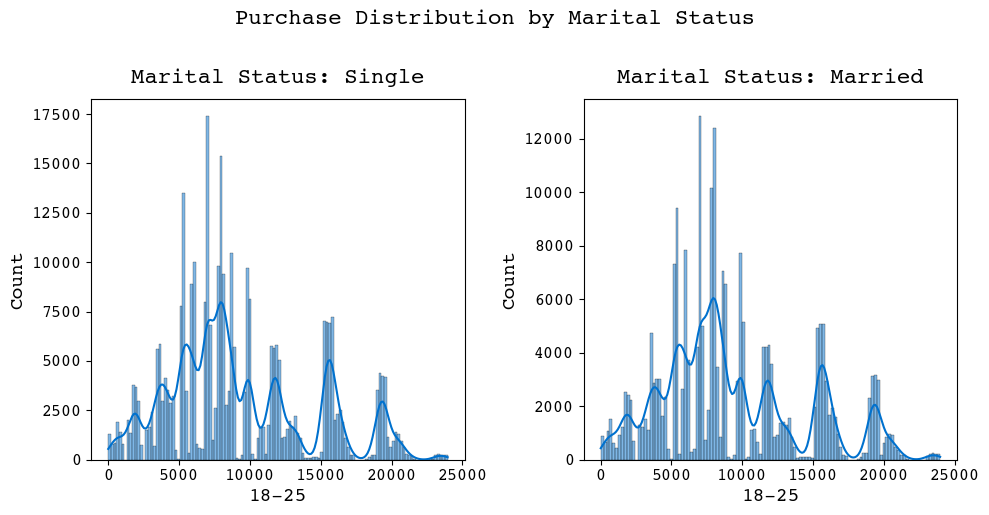

In [815]:
fig=plt.figure(figsize=(10,5)).suptitle("Purchase Distribution by Marital Status", y=1.02, fontsize = 16, fontname='Courier')
for i,marital_status in enumerate(unique_marital_status):
    plt.subplot(1,2,i+1)
    sns.histplot(df.loc[df["Marital_Status"] == marital_status, "Purchase"], kde=True, color=plot_palette[0])
    plt.xticks(fontsize = 12, fontname='Courier')
    plt.yticks(fontsize = 12, fontname='Courier')
    plt.xlabel(age_range, fontsize = 14, fontname='Courier')
    plt.ylabel("Count", fontsize = 14, fontname='Courier')
    plt.title("Marital Status: " + marital_status, y=1.02, fontsize = 16, fontname='Courier')
plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [816]:
H0 = "There is no significant difference in the average shopping done by single and married people."
Ha = "There is a significant difference in the average shopping done by single and married people."

alpha = 0.05

f_stats, p_value = kruskal(
    age_wise_dt[0], age_wise_dt[1], age_wise_dt[2], age_wise_dt[3], age_wise_dt[4], age_wise_dt[5], age_wise_dt[6]
    )

print(f_stats, p_value)

if p_value < alpha:
    print("Reject H0, ", Ha)
else:
    print("Fail to reject H0, ", H0)

315.65242682849174 3.612251655399266e-65
Reject H0,  There is a significant difference in the average shopping done by single and married people.


In [817]:
def find_duplicate_values_with_keys(d):
    value_to_keys = {}
    duplicate_values = set()

    for key, value in d.items():
        if value in value_to_keys:
            duplicate_values.add(value)
            value_to_keys[value].append(key)
        else:
            value_to_keys[value] = [key]

    return {value: keys for value, keys in value_to_keys.items() if len(keys) > 1}

In [818]:
df_t = df.copy()

for col in df.columns:
    if df[col].dtype == 'O':
        unique_vals = df[col].unique()
        #print(len(unique_vals))
        col_val_map = {}

        for i, val in enumerate(unique_vals):
            col_val_map[val] = i
        #print(col_val_map, find_duplicate_values_with_keys(col_val_map))

        df_t[col] = df_t[col].map(col_val_map).astype(int)

In [819]:
df_t.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,0,0,0,0,0,0,0,0,0,8370
1,0,1,0,0,0,0,0,0,1,15200
2,0,2,0,0,0,0,0,0,2,1422
3,0,3,0,0,0,0,0,0,2,1057
4,1,4,1,1,1,1,1,0,3,7969
5,2,5,1,2,2,0,2,0,1,15227
6,3,6,1,3,3,2,0,1,1,19215
7,3,7,1,3,3,2,0,1,1,15854
8,3,8,1,3,3,2,0,1,1,15686
9,4,9,1,2,4,0,3,1,3,7871


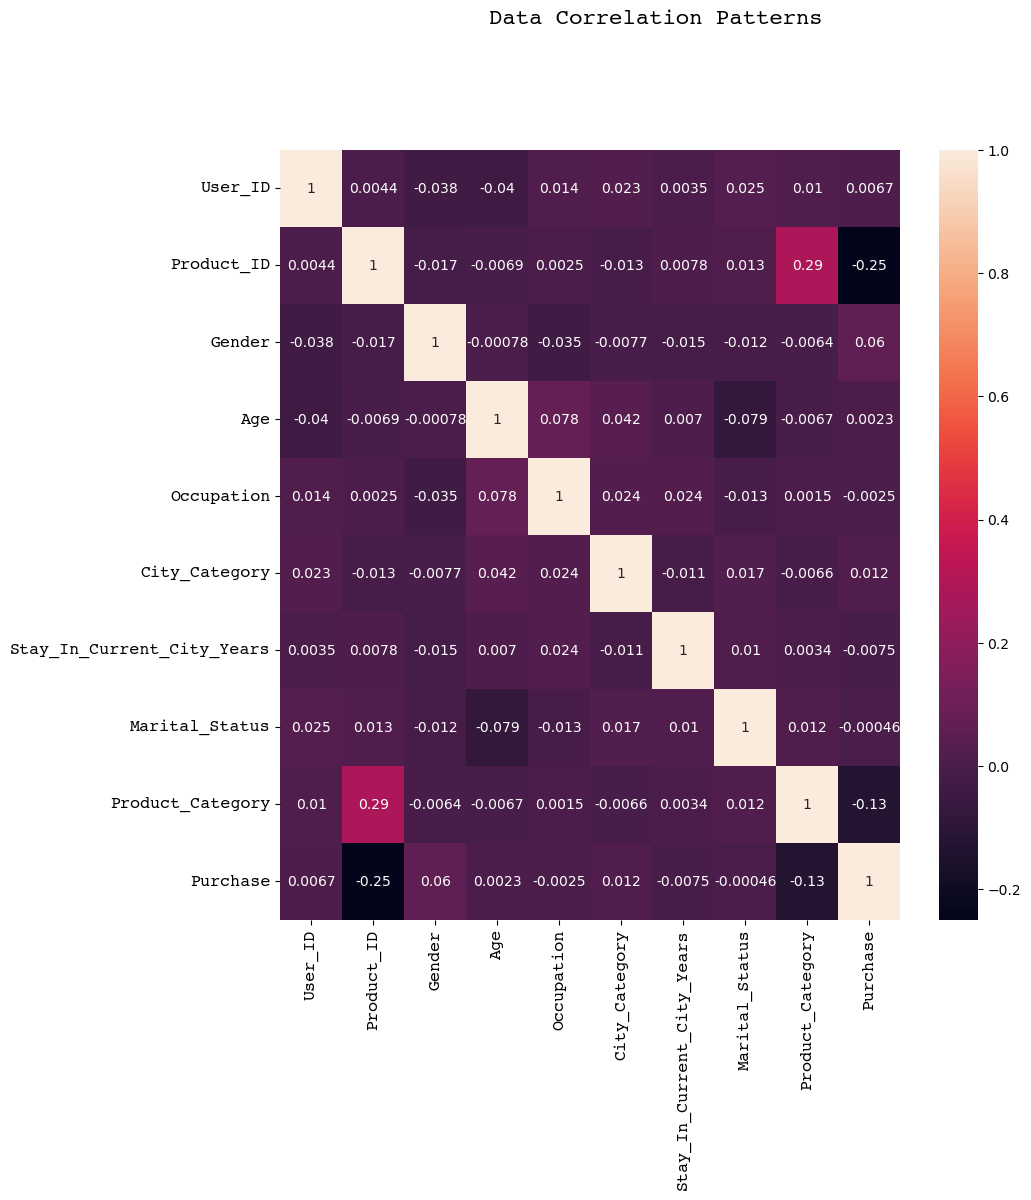

In [820]:
fig=plt.figure(figsize=(10,10)).suptitle("Data Correlation Patterns", y=1.02, fontsize = 16, fontname='Courier')
sns.heatmap(df_t.corr(), annot=True)
plt.xticks(fontsize = 12, fontname='Courier')
plt.yticks(fontsize = 12, fontname='Courier')
plt.show()